# *Caso de Estudio Nhanes* #

El Estudio Nacional de Examen de Salud y Nutrición (National Health and Nutrition Examination Survey, NHANES) es un programa de encuestas diseñado para evaluar la salud y el estado nutricional de adultos y niños en los Estados Unidos. A través de entrevistas y exámenes físicos, NHANES recopila datos que ayudan a comprender las condiciones prevalentes en la población, como enfermedades crónicas, deficiencias nutricionales, y problemas de salud mental, incluyendo la depresión.

## *Etapa 1: Comprensión del Negocio*

El objetivo de este estudio es (rellenar)

### Inicio

In [104]:
%load_ext kedro.ipython
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import mstats
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [105]:
demografia = catalog.load("demografia")
insulina = catalog.load("insulina")
colesterol = catalog.load("colesterol")
depresion = catalog.load("depresion")
proteinaC = catalog.load("proteinaC")
scaler = StandardScaler()
minmax = MinMaxScaler()
pt = PowerTransformer(method='yeo-johnson')

[09/08/24 05:33:04] INFO     Loading data from demografia (ParquetDataset)...                   ]8;id=447186;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=964508;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from insulina (ParquetDataset)...                     ]8;id=233285;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=17013;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from colesterol (ParquetDataset)...                   ]8;id=946171;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=470189;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from depresion (ParquetDataset)...                    ]8;id=728252;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=311276;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

                    INFO     Loading data from proteinaC (ParquetDataset)...                    ]8;id=785175;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=782295;file://C:\Python312\Lib\site-packages\kedro\io\data_catalog.py#539\539]8;;\

In [106]:
for columna in demografia.columns:
    print(f"------------ Columna {columna} ------------\n {demografia[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count    15560.00
mean    117042.50
std       4491.93
min     109263.00
25%     113152.75
50%     117042.50
75%     120932.25
max     124822.00
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna SDDSRVYR ------------
 count   15560.00
mean       66.00
std         0.00
min        66.00
25%        66.00
50%        66.00
75%        66.00
max        66.00
Name: SDDSRVYR, dtype: float64
 ------------------------------------ 

------------ Columna RIDSTATR ------------
 count   15560.00
mean        1.92
std         0.27
min         1.00
25%         2.00
50%         2.00
75%         2.00
max         2.00
Name: RIDSTATR, dtype: float64
 ------------------------------------ 

------------ Columna RIAGENDR ------------
 count   15560.00
mean        1.50
std         0.50
min         1.00
25%         1.00
50%         2.00
75%         2.00
max         2.00
Name: RIAGENDR, dtype: float64
 -----------------------------------

In [107]:
for columna in insulina.columns:
    print(f"------------ Columna {columna} ------------\n {insulina[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count     5090.00
mean    117177.33
std       4487.34
min     109264.00
25%     113303.50
50%     117265.50
75%     121046.50
max     124822.00
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna WTSAFPRP ------------
 count     5090.00
mean     53883.96
std      68538.13
min          0.00
25%      17305.97
50%      32845.10
75%      62135.88
max     741259.19
Name: WTSAFPRP, dtype: float64
 ------------------------------------ 

------------ Columna LBXIN ------------
 count   4625.00
mean      14.98
std       22.85
min        0.71
25%        6.31
50%       10.18
75%       16.61
max      512.50
Name: LBXIN, dtype: float64
 ------------------------------------ 

------------ Columna LBDINSI ------------
 count   4625.00
mean      89.85
std      137.07
min        4.26
25%       37.86
50%       61.08
75%       99.66
max     3075.00
Name: LBDINSI, dtype: float64
 ------------------------------------ 

------------

In [108]:
for columna in colesterol.columns:
    print(f"------------ Columna {columna} ------------\n {colesterol[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count    12198.00
mean    117082.95
std       4498.67
min     109264.00
25%     113178.25
50%     117098.50
75%     120994.75
max     124822.00
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna LBXTC ------------
 count   10828.00
mean      177.46
std        40.36
min        71.00
25%       149.00
50%       173.00
75%       201.00
max       446.00
Name: LBXTC, dtype: float64
 ------------------------------------ 

------------ Columna LBDTCSI ------------
 count   10828.00
mean        4.59
std         1.04
min         1.84
25%         3.85
50%         4.47
75%         5.20
max        11.53
Name: LBDTCSI, dtype: float64
 ------------------------------------ 



In [109]:
for columna in depresion.columns:
    print(f"------------ Columna {columna} ------------\n {depresion[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count     8965.00
mean    117107.85
std       4501.05
min     109266.00
25%     113211.00
50%     117091.00
75%     121022.00
max     124822.00
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna DPQ010 ------------
 count   8308.00
mean       0.40
std        0.80
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        9.00
Name: DPQ010, dtype: float64
 ------------------------------------ 

------------ Columna DPQ020 ------------
 count   8306.00
mean       0.37
std        0.76
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        9.00
Name: DPQ020, dtype: float64
 ------------------------------------ 

------------ Columna DPQ030 ------------
 count   8306.00
mean       0.66
std        0.99
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        9.00
Name: DPQ030, dtype: float64
 ------------------------------------ 

------------ Columna DPQ040 ----

In [110]:
for columna in proteinaC.columns:
    print(f"------------ Columna {columna} ------------\n {proteinaC[columna].describe()}\n ------------------------------------ \n")

------------ Columna SEQN ------------
 count    13772.00
mean    117079.86
std       4498.55
min     109263.00
25%     113184.75
50%     117104.50
75%     120981.25
max     124822.00
Name: SEQN, dtype: float64
 ------------------------------------ 

------------ Columna LBXHSCRP ------------
 count   11614.00
mean        3.42
std         7.79
min         0.11
25%         0.52
50%         1.32
75%         3.62
max       246.86
Name: LBXHSCRP, dtype: float64
 ------------------------------------ 

------------ Columna LBDHRPLC ------------
 count   11614.00
mean        0.03
std         0.18
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         1.00
Name: LBDHRPLC, dtype: float64
 ------------------------------------ 



In [111]:
demografia.columns


Index(['SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN',
       'RIDRETH1', 'RIDRETH3', 'RIDEXMON', 'DMDBORN4', 'DMDYRUSZ', 'DMDEDUC2',
       'DMDMARTZ', 'RIDEXPRG', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG',
       'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANGA',
       'WTINTPRP', 'WTMECPRP', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR'],
      dtype='object')

# Creación de dataframe con Id, Edad, Género, Raza, Educación, Estado Civil, Nivel de Pobreza

In [112]:
consideracion = pd.DataFrame()
consideracion["ID"] = demografia["SEQN"]
consideracion["Edad"] = demografia["RIDAGEYR"]
consideracion["Genero"] = demografia["RIAGENDR"] #1 = hombre; 2= mujer
consideracion["Raza"] = demografia["RIDRETH3"] # 1 = mexico; 2 = otro hispano; 3 = Blanco; 4= negro; 6= asiatico; 7 = otro
consideracion["Educacion"] = demografia["DMDEDUC2"] #ver nhanes
consideracion["EstadoCivil"] = demografia["DMDMARTZ"]
consideracion["NivelPobreza"] = demografia["INDFMPIR"]

In [113]:
pd.options.display.float_format = '{:.2f}'.format
consideracion[consideracion["NivelPobreza"]<1]

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza
1,109264.00,13.00,2.00,1.00,NaN,NaN,0.83
6,109269.00,2.00,1.00,2.00,NaN,NaN,0.96
9,109272.00,0.00,1.00,1.00,NaN,NaN,0.73
10,109273.00,36.00,1.00,3.00,4.00,3.00,0.83
13,109276.00,0.00,1.00,4.00,NaN,NaN,0.00
...,...,...,...,...,...,...,...
15524,124787.00,19.00,2.00,4.00,NaN,NaN,0.80
15529,124792.00,32.00,1.00,2.00,5.00,3.00,0.00
15535,124798.00,55.00,1.00,2.00,1.00,3.00,0.80
15543,124806.00,4.00,2.00,4.00,NaN,NaN,0.38


In [114]:
for columna in consideracion.columns:
    if consideracion[columna].isna().sum() != 0:
        print(f"Columna {columna} tiene {consideracion[columna].isna().sum()} NaN")

Columna Educacion tiene 6328 NaN
Columna EstadoCivil tiene 6328 NaN
Columna NivelPobreza tiene 2201 NaN


In [115]:
consideracion.loc[consideracion["Edad"] <= 13, "Educacion"] = consideracion.loc[consideracion["Edad"] <= 13, "Educacion"].fillna(1)
consideracion.loc[consideracion["Edad"] <= 18, "Educacion"] = consideracion.loc[consideracion["Edad"] <= 18, "Educacion"].fillna(2)
consideracion.loc[consideracion["Edad"] <= 18, "EstadoCivil"] = consideracion.loc[consideracion["Edad"] <= 18, "EstadoCivil"].fillna(3)

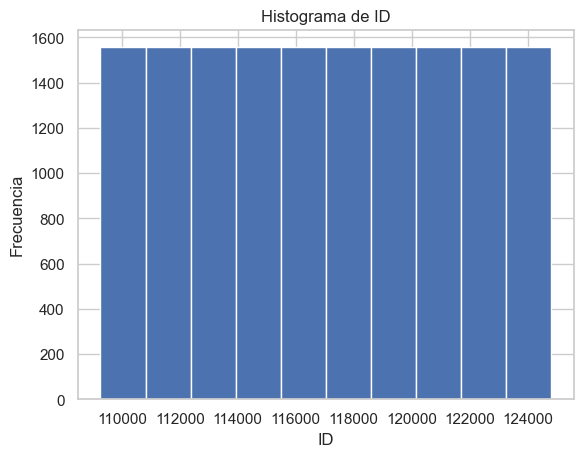

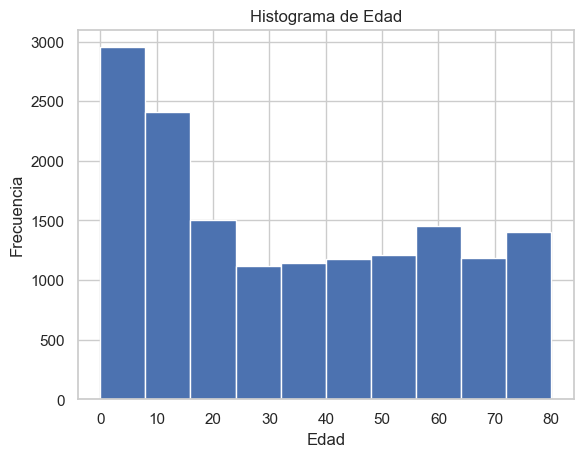

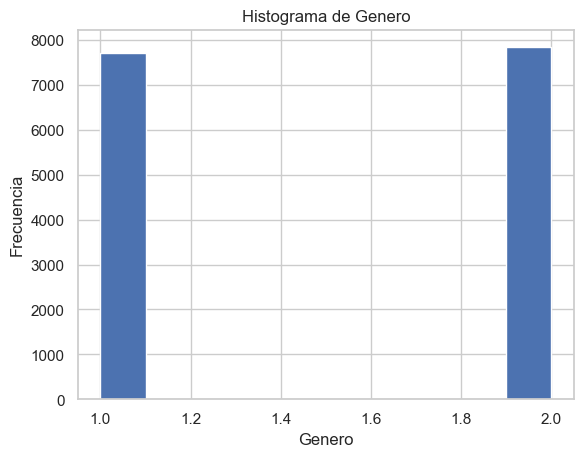

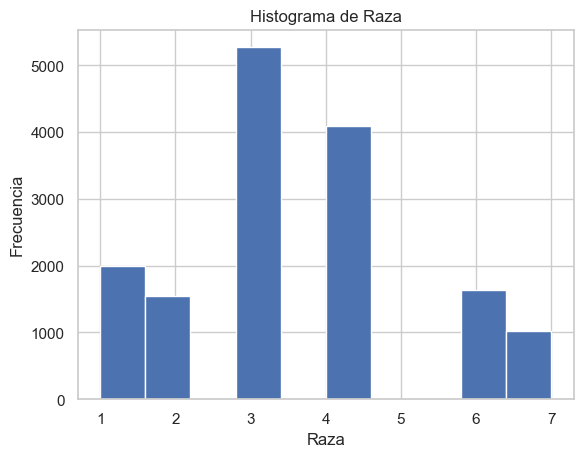

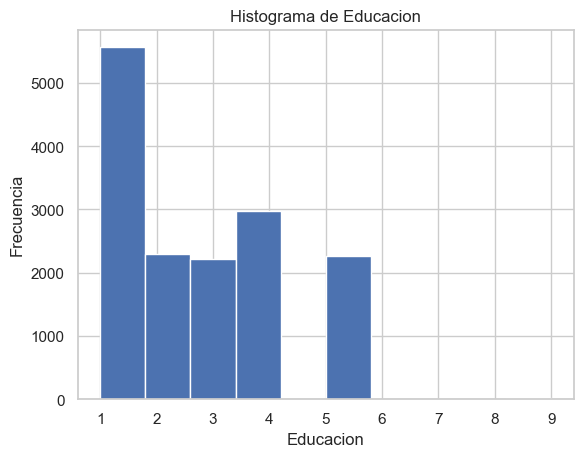

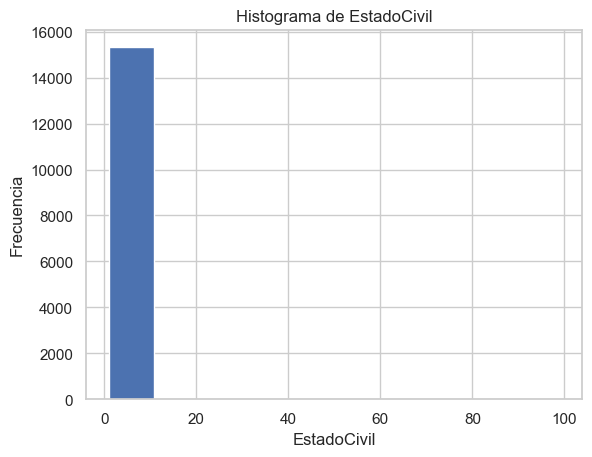

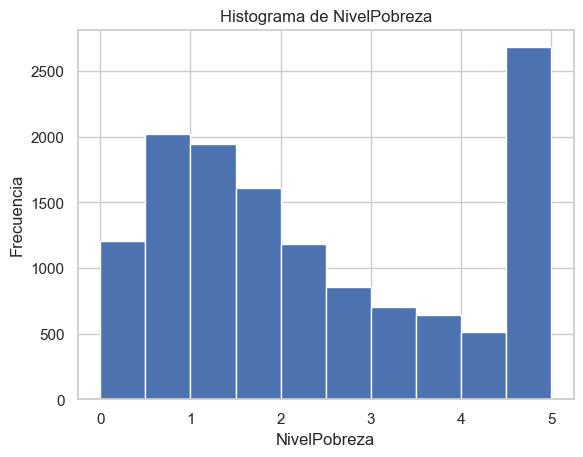

In [116]:
for col in consideracion.columns:
  plt.hist(consideracion[col])
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [117]:
consideracion = consideracion.loc[consideracion['NivelPobreza'] <5]

In [118]:
pobreza_escalado = scaler.fit_transform(consideracion[['NivelPobreza']])
pobreza_minmax = minmax.fit_transform(consideracion[['NivelPobreza']])
pobreza_pt = pt.fit_transform(consideracion[['NivelPobreza']])
pobreza_sqrt = np.sqrt(consideracion[['NivelPobreza']])
pobreza_boxcox, _ = stats.boxcox(consideracion["NivelPobreza"] + 1)
log_data = np.log1p(consideracion[['NivelPobreza']])

In [119]:
for pobre in [pobreza_boxcox,log_data,pobreza_escalado,pobreza_minmax,pobreza_pt,pobreza_sqrt]:
    df = pd.DataFrame(pobre)
    print(df.describe())

             0
count 11213.00
mean      1.03
std       0.50
min       0.00
25%       0.66
50%       1.02
75%       1.42
max       1.96
       NivelPobreza
count      11213.00
mean           0.97
std            0.45
min            0.00
25%            0.64
50%            0.97
75%            1.32
max            1.79
             0
count 11213.00
mean      0.00
std       1.00
min      -1.49
25%      -0.79
50%      -0.21
75%       0.65
max       2.39
             0
count 11213.00
mean      0.38
std       0.26
min       0.00
25%       0.18
50%       0.33
75%       0.55
max       1.00
             0
count 11213.00
mean      0.00
std       1.00
min      -2.08
25%      -0.74
50%      -0.02
75%       0.77
max       1.88
       NivelPobreza
count      11213.00
mean           1.29
std            0.50
min            0.00
25%            0.95
50%            1.28
75%            1.66
max            2.23


[09/08/24 05:33:05] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=306343;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=114427;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=645181;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=865048;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=537550;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=672904;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=208234;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=829808;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

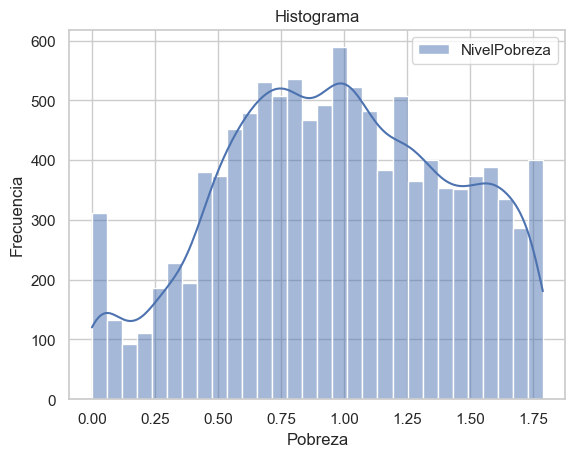

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=232630;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=307346;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=167320;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=201814;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

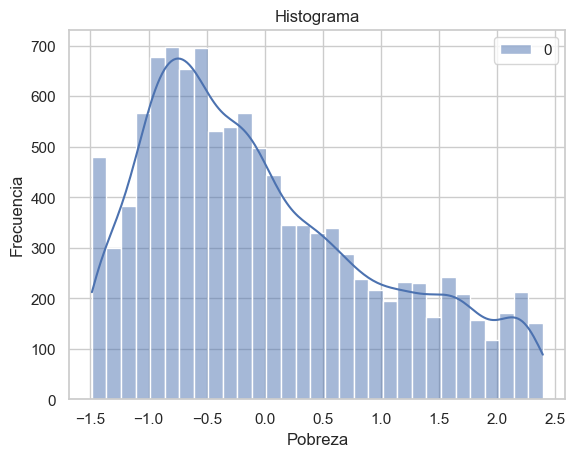

[09/08/24 05:33:06] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=532014;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=433014;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=436352;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=874775;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

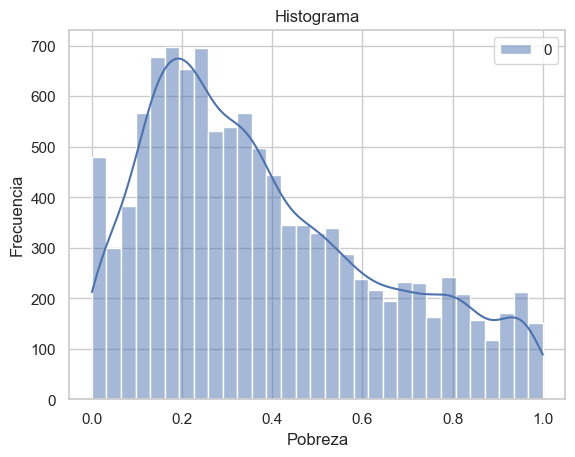

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=61554;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=833398;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=410771;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=270299;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

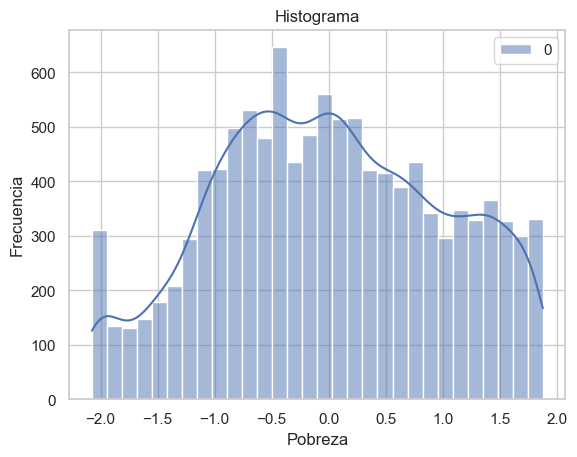

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=723343;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=160129;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=654579;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=767695;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=515875;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=28181;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1075:               ]8;id=692131;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=328932;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: When grouping with a length-1 list-like, you will need                 
                             to pass a length-1 tuple to get_group in a future version of pandas.                  
                             Pass `(name,)` instead of `name` to silence this warning.                             
                               data_subset = grouped_data.get_group(pd_key)                                        
                                                                                                                   

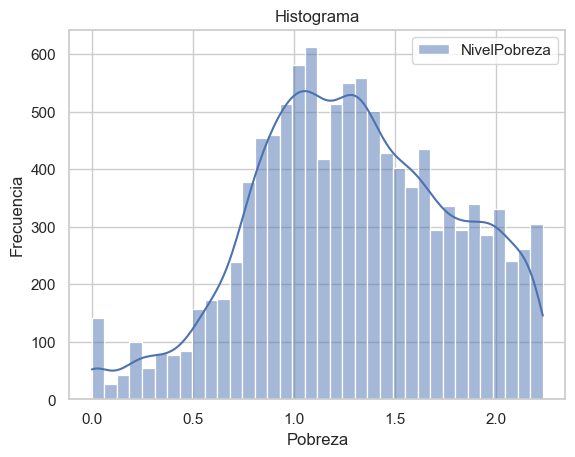

In [120]:
for pobre in [log_data,pobreza_escalado,pobreza_minmax,pobreza_pt,pobreza_sqrt]:
    sns.histplot(data=pobre, kde=True)
    plt.title(f'Histograma')
    plt.xlabel("Pobreza")
    plt.ylabel('Frecuencia')
    plt.show()

In [121]:
consideracion['NivelPobreza'] = pobreza_sqrt

In [122]:
knn_imputer = KNNImputer(n_neighbors=10, weights="uniform")
consideracion['NivelPobreza'] = knn_imputer.fit_transform(pobreza_sqrt[['NivelPobreza']])
consideracion

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza
0,109263.00,2.00,1.00,6.00,1.00,3.00,2.16
1,109264.00,13.00,2.00,1.00,1.00,3.00,0.91
2,109265.00,2.00,1.00,3.00,1.00,3.00,1.75
5,109268.00,18.00,2.00,3.00,2.00,3.00,1.29
6,109269.00,2.00,1.00,2.00,1.00,3.00,0.98
...,...,...,...,...,...,...,...
15554,124817.00,67.00,2.00,1.00,2.00,1.00,1.48
15555,124818.00,40.00,1.00,4.00,5.00,1.00,1.95
15556,124819.00,2.00,1.00,4.00,1.00,3.00,0.26
15557,124820.00,7.00,2.00,3.00,1.00,3.00,1.10


In [123]:
consideracion["NivelPobreza"].describe()


count   11213.00
mean        1.29
std         0.50
min         0.00
25%         0.95
50%         1.28
75%         1.66
max         2.23
Name: NivelPobreza, dtype: float64

In [124]:
consideracion.isna().sum()


ID                0
Edad              0
Genero            0
Raza              0
Educacion       173
EstadoCivil     173
NivelPobreza      0
dtype: int64

In [125]:
#consideracion = consideracion.dropna()

In [126]:
consideracion["Educacion"].isna().sum()

np.int64(173)

In [127]:
consideracion["NivelPobreza"].describe()


count   11213.00
mean        1.29
std         0.50
min         0.00
25%         0.95
50%         1.28
75%         1.66
max         2.23
Name: NivelPobreza, dtype: float64

# Combinación de dataset con Insulina

In [128]:
insulina['SEQN'] = insulina['SEQN'].astype(int)
insulina = insulina.rename(columns={'SEQN': 'ID'})
insulina = insulina.rename(columns={'WTSAFPRP': "Peso de Submuestra en Ayunas"})
insulina = insulina.rename(columns={'LBXIN': "Insulina (μU/mL)"})
insulina = insulina.rename(columns={'LBDINSI': "Insulina (pmol/L)"})
insulina = insulina.rename(columns={'LBDINLC': "Código de Comentario de Insulina"})


In [129]:
consideracion_insulina = pd.merge(consideracion, insulina, on='ID', how='inner')

In [130]:
consideracion_insulina.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina
count,3650.00,3650.00,3650.00,3650.00,3582.00,3582.00,3650.00,3650.00,3307.00,3307.00,3307.00
mean,117187.07,43.93,1.52,3.45,3.12,1.87,1.33,48912.22,15.45,92.69,0.00
std,4467.37,20.82,0.50,1.62,1.25,0.88,0.48,60974.78,23.11,138.67,0.05
min,109264.00,12.00,1.00,1.00,1.00,1.00,0.00,0.00,0.71,4.26,0.00
25%,113370.75,25.00,1.00,3.00,2.00,1.00,1.00,16798.02,6.49,38.94,0.00
50%,117331.50,44.00,2.00,3.00,3.00,2.00,1.31,31798.15,10.38,62.28,0.00
75%,121059.25,62.00,2.00,4.00,4.00,3.00,1.68,57227.95,17.15,102.90,0.00
max,124821.00,80.00,2.00,7.00,5.00,3.00,2.23,741259.19,485.10,2910.60,1.00


In [131]:
Q1 = consideracion_insulina["Insulina (μU/mL)"].quantile(0.25)
Q3 = consideracion_insulina["Insulina (μU/mL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers = consideracion_insulina[(consideracion_insulina["Insulina (μU/mL)"] < lower_bound) | (consideracion_insulina["Insulina (μU/mL)"] > upper_bound)]

# Removing outliers
consideracion_insulina_limpio = consideracion_insulina[~((consideracion_insulina["Insulina (μU/mL)"] < lower_bound) | (consideracion_insulina["Insulina (μU/mL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers)

print(num_outliers)


 El IQR es 10.659999999999998. El límite inferior es: -9.499999999999998, el superior es 33.14
227


In [132]:
Q1 = consideracion_insulina_limpio["Insulina (μU/mL)"].quantile(0.25)
Q3 = consideracion_insulina_limpio["Insulina (μU/mL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers = consideracion_insulina_limpio[(consideracion_insulina_limpio["Insulina (μU/mL)"] < lower_bound) | (consideracion_insulina_limpio["Insulina (μU/mL)"] > upper_bound)]

# Removing outliers
insulina_limpio = consideracion_insulina_limpio[~((consideracion_insulina_limpio["Insulina (μU/mL)"] < lower_bound) | (consideracion_insulina_limpio["Insulina (μU/mL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers)

print(num_outliers)

 El IQR es 8.952499999999999. El límite inferior es: -7.188749999999997, el superior es 28.621249999999996
91


In [133]:
insulina_limpio.isna().sum()


ID                                    0
Edad                                  0
Genero                                0
Raza                                  0
Educacion                            59
EstadoCivil                          59
NivelPobreza                          0
Peso de Submuestra en Ayunas          0
Insulina (μU/mL)                    343
Insulina (pmol/L)                   343
Código de Comentario de Insulina    343
dtype: int64

In [134]:
insulina_limpio.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina
count,3332.00,3332.00,3332.00,3332.00,3273.00,3273.00,3332.00,3332.00,2989.00,2989.00,2989.00
mean,117201.71,44.08,1.52,3.48,3.12,1.87,1.33,49067.66,10.94,65.66,0.00
std,4464.66,20.88,0.50,1.62,1.26,0.88,0.49,61251.29,6.22,37.33,0.05
min,109264.00,12.00,1.00,1.00,1.00,1.00,0.00,0.00,0.71,4.26,0.00
25%,113395.75,25.00,1.00,3.00,2.00,1.00,1.00,16954.33,6.17,37.02,0.00
50%,117358.50,44.00,2.00,3.00,3.00,2.00,1.32,31798.15,9.59,57.54,0.00
75%,121054.00,62.00,2.00,4.00,4.00,3.00,1.69,57008.16,14.47,86.82,0.00
max,124821.00,80.00,2.00,7.00,5.00,3.00,2.23,741259.19,28.51,171.06,1.00


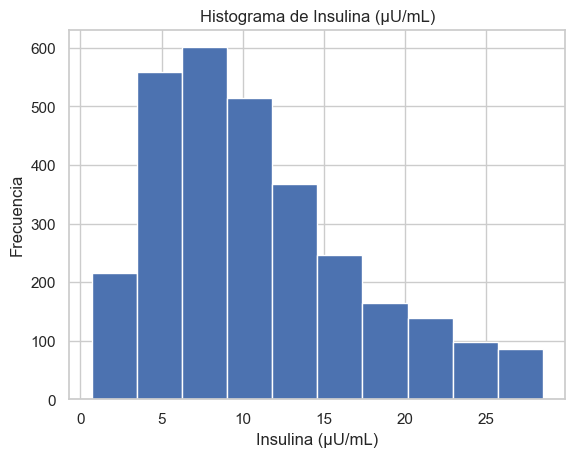

In [135]:
plt.hist(insulina_limpio["Insulina (μU/mL)"])
plt.title(f'Histograma de {"Insulina (μU/mL)"}')
plt.xlabel("Insulina (μU/mL)")
plt.ylabel('Frecuencia')
plt.show()

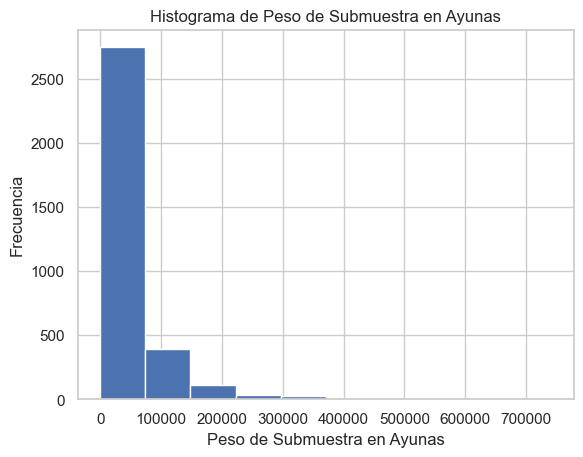

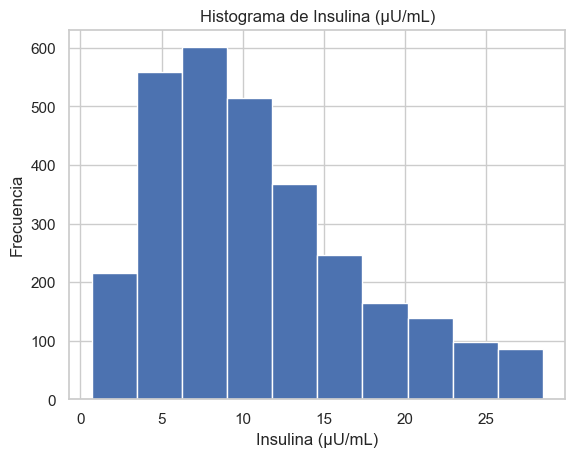

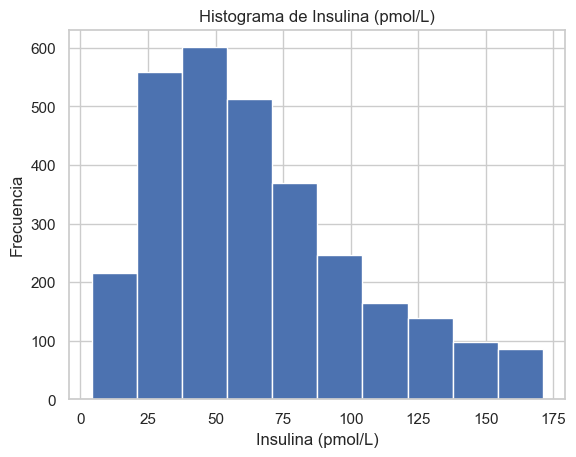

In [136]:
for col in insulina_limpio.columns[7:-1]:
  plt.hist(insulina_limpio[col])
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [137]:
escalado = scaler.fit_transform(insulina_limpio[["Insulina (μU/mL)"]])
minmaxesc = minmax.fit_transform(insulina_limpio[["Insulina (μU/mL)"]])
powerTrans = pt.fit_transform(insulina_limpio[["Insulina (μU/mL)"]])

In [138]:
insulina_escalado = insulina_limpio.copy()
insulina_minmax = insulina_limpio.copy()
insulina_power = insulina_limpio.copy()
insulina_escalado["Insulina (μU/mL)"]=escalado
insulina_minmax["Insulina (μU/mL)"]=minmaxesc
insulina_power["Insulina (μU/mL)"]=powerTrans

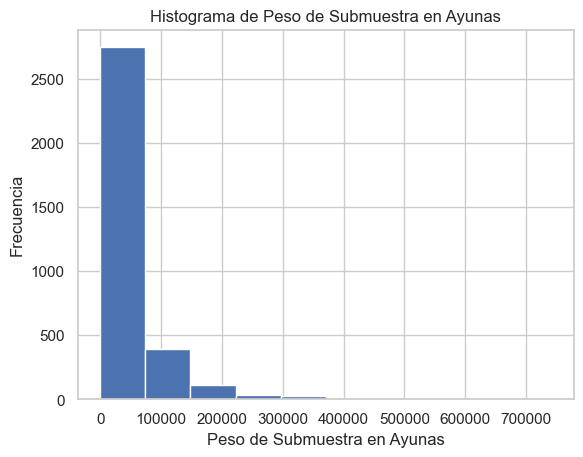

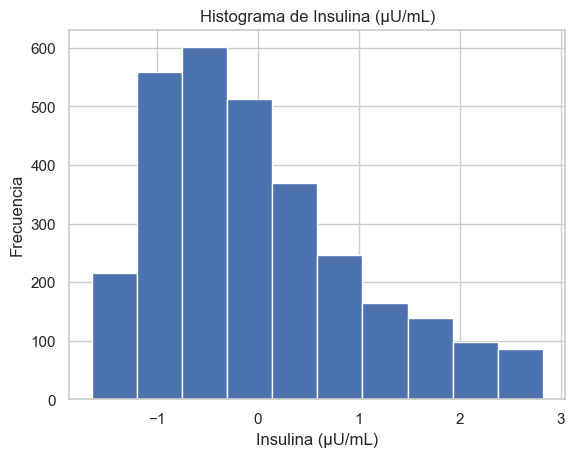

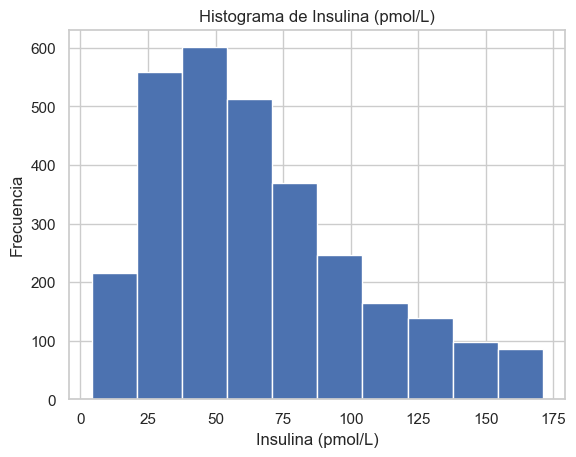

In [139]:
for col in insulina_escalado.columns[7:-1]:
  plt.hist(insulina_escalado[col])
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

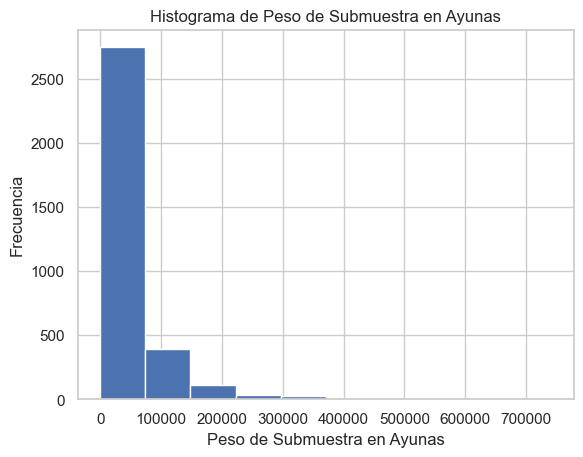

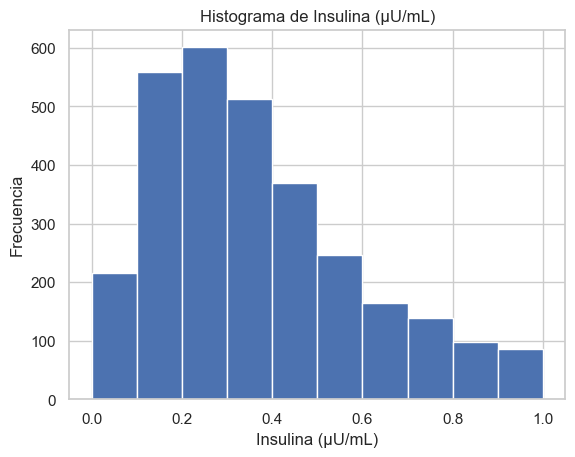

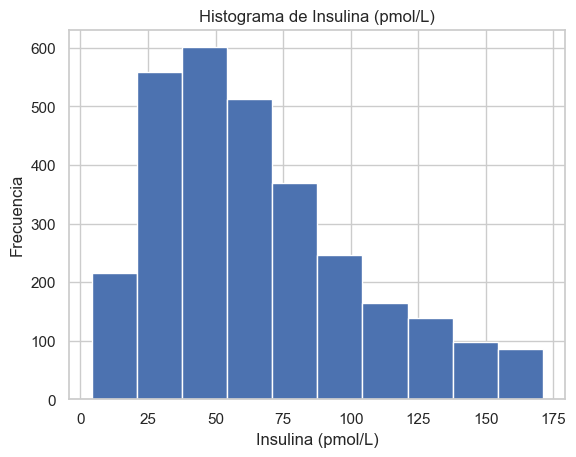

In [140]:
for col in insulina_minmax.columns[7:-1]:
  plt.hist(insulina_minmax[col])
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [141]:
Q1 = insulina_escalado["Insulina (μU/mL)"].quantile(0.25)
Q3 = insulina_escalado["Insulina (μU/mL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers = insulina_escalado[(insulina_escalado["Insulina (μU/mL)"] < lower_bound) | (insulina_escalado["Insulina (μU/mL)"] > upper_bound)]

# Removing outliers
limpieza_insulina = insulina_escalado[~((insulina_escalado["Insulina (μU/mL)"] < lower_bound) | (insulina_escalado["Insulina (μU/mL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers)

print(num_outliers)

 El IQR es 1.3341734967127177. El límite inferior es: -2.7685061346628896, el superior es 2.5681878521879806
49


In [142]:
limp_ins = limpieza_insulina.copy()
limp_ins["Insulina (μU/mL)"] = pt.fit_transform(limp_ins[["Insulina (μU/mL)"]])

[09/08/24 05:33:08] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=603198;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=909807;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

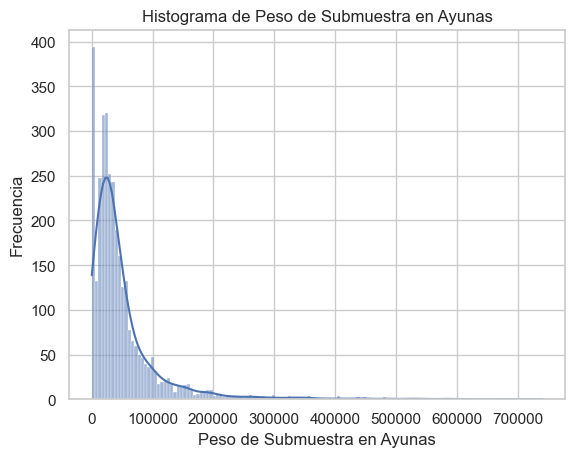

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=790950;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=777907;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

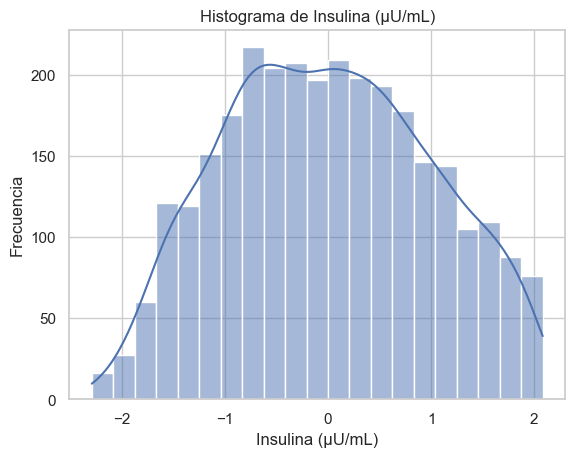

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=361699;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=336489;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

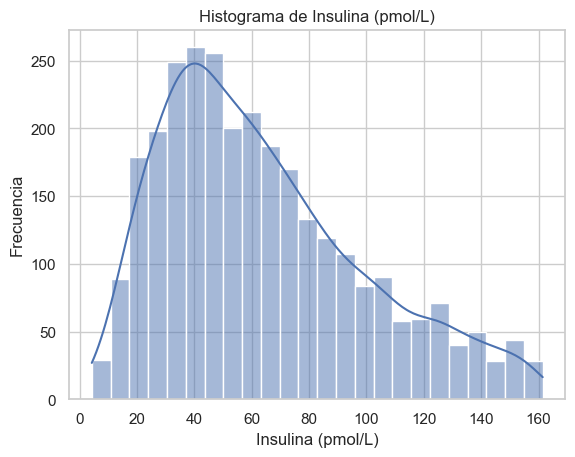

In [143]:
for col in insulina_power.columns[7:-1]:
  sns.histplot(data=limp_ins, x=col, kde=True)
  plt.title(f'Histograma de {col}')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [144]:
limp_ins.isna().sum()


ID                                    0
Edad                                  0
Genero                                0
Raza                                  0
Educacion                            59
EstadoCivil                          59
NivelPobreza                          0
Peso de Submuestra en Ayunas          0
Insulina (μU/mL)                    343
Insulina (pmol/L)                   343
Código de Comentario de Insulina    343
dtype: int64

In [145]:
knn_imputer = KNNImputer(n_neighbors=10, weights="uniform")
limp_ins["Insulina (μU/mL)"] = knn_imputer.fit_transform(limp_ins[["Insulina (μU/mL)"]])

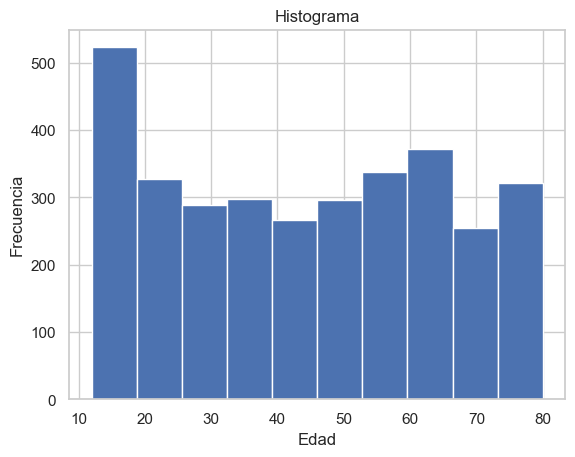

In [146]:
plt.hist(limp_ins["Edad"])
plt.title(f'Histograma')
plt.xlabel("Edad")
plt.ylabel('Frecuencia')
plt.show()

In [147]:

limp_ins["Edad"], lambda_opt = boxcox(limp_ins["Edad"] + 1)

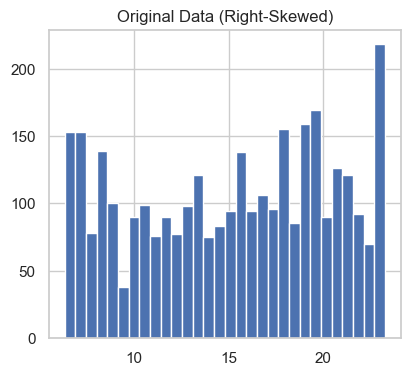

In [148]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(limp_ins["Edad"], bins=30)
plt.title('Original Data (Right-Skewed)')
plt.show()

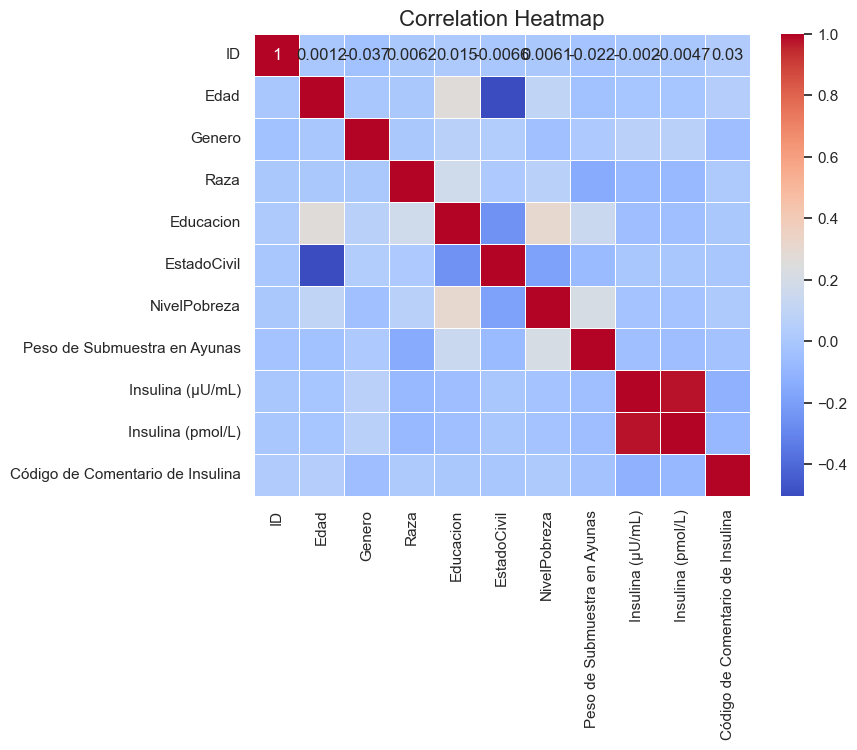

In [149]:
corr_matrix = limp_ins.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set titles and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Conclusión: SIGUE SIN HABER RELACIÓN >:(

In [150]:
#insulina_nonna = consideracion_insulina.dropna()

# Combinación de Dataset con Colesterol

In [151]:
colesterol = colesterol.rename(columns={
    'SEQN': 'ID',
    'LBXTC': 'Colesterol Total (mg/dL)',
    'LBDTCSI': 'Colesterol Total (mmol/L)'
})

In [152]:
consideracion_colesterol = pd.merge(consideracion, colesterol, on='ID', how='inner')

In [153]:
consideracion_colesterol.head()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Colesterol Total (mg/dL),Colesterol Total (mmol/L)
0,109264.00,13.00,2.00,1.00,1.00,3.00,0.91,166.00,4.29
1,109270.00,11.00,2.00,4.00,1.00,3.00,1.37,103.00,2.66
2,109273.00,36.00,1.00,3.00,4.00,3.00,0.91,164.00,4.24
3,109274.00,68.00,1.00,7.00,4.00,3.00,1.10,105.00,2.72
4,109275.00,6.00,1.00,3.00,1.00,3.00,1.93,167.00,4.32


In [154]:
consideracion_colesterol.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Colesterol Total (mg/dL),Colesterol Total (mmol/L)
count,8850.00,8850.00,8850.00,8850.00,8691.00,8691.00,8850.00,7840.00,7840.00
mean,117107.10,38.22,1.51,3.45,2.77,2.08,1.31,176.14,4.55
std,4477.06,23.35,0.50,1.61,1.38,1.21,0.49,40.15,1.04
min,109264.00,6.00,1.00,1.00,1.00,1.00,0.00,73.00,1.89
25%,113263.50,16.00,1.00,3.00,1.00,1.00,0.97,148.00,3.83
50%,117163.50,36.00,2.00,3.00,3.00,2.00,1.30,171.00,4.42
75%,121016.75,59.00,2.00,4.00,4.00,3.00,1.67,200.00,5.17
max,124821.00,80.00,2.00,7.00,9.00,77.00,2.23,446.00,11.53


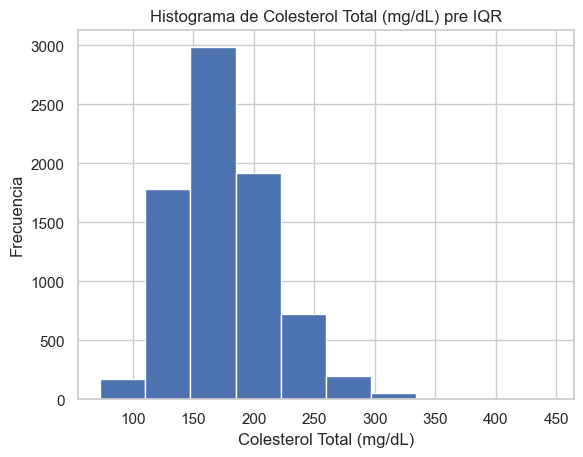

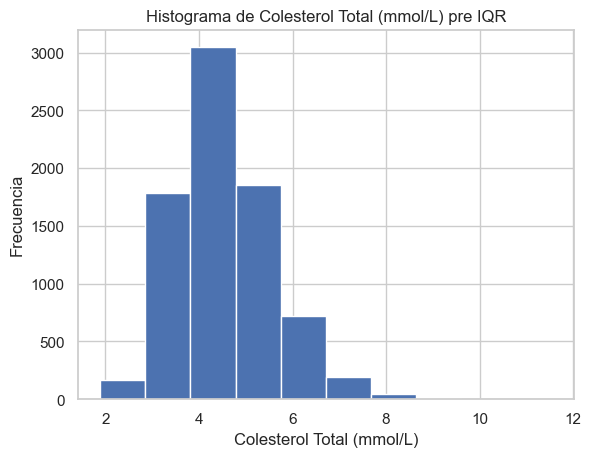

In [155]:
for col in consideracion_colesterol.columns[7:]:
  plt.hist(consideracion_colesterol[col])
  plt.title(f'Histograma de {col} pre IQR')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

In [156]:
Q1 = consideracion_colesterol["Colesterol Total (mg/dL)"].quantile(0.25)
Q3 = consideracion_colesterol["Colesterol Total (mg/dL)"].quantile(0.75)
IQR = Q3 - Q1

# Calculating the bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

# Identifying outliers
outliers_colesterol = consideracion_colesterol[(consideracion_colesterol["Colesterol Total (mg/dL)"] < lower_bound) | (consideracion_colesterol["Colesterol Total (mg/dL)"] > upper_bound)]

# Removing outliers
consideracion_colesterol_limpio = consideracion_colesterol[~((consideracion_colesterol["Colesterol Total (mg/dL)"] < lower_bound) | (consideracion_colesterol["Colesterol Total (mg/dL)"] > upper_bound))]

# Checking the number of outliers
num_outliers = len(outliers_colesterol)

print(num_outliers)

 El IQR es 52.0. El límite inferior es: 70.0, el superior es 278.0
133


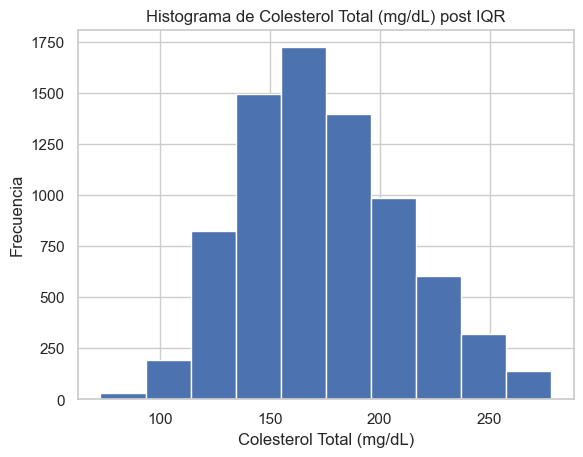

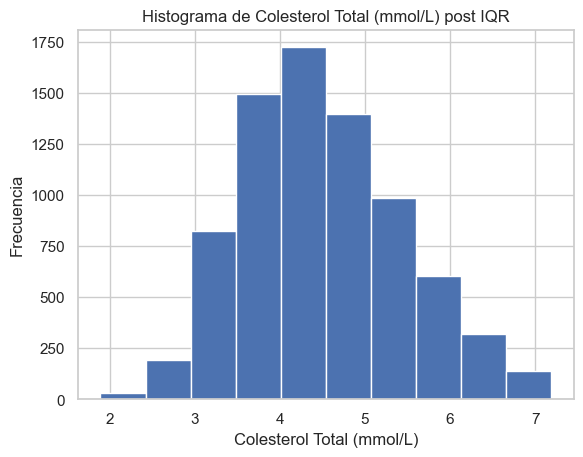

In [157]:
for col in consideracion_colesterol_limpio.columns[7:]:
  plt.hist(consideracion_colesterol_limpio[col])
  plt.title(f'Histograma de {col} post IQR')
  plt.xlabel(col)
  plt.ylabel('Frecuencia')
  plt.show()

# Combinación de Dataset con Proteína C Spoiler: No pude lograr la distribución normal en la proteína :(

In [158]:
proteinaC = proteinaC.rename(columns={
    'SEQN': 'ID',
    'LBXHSCRP': 'Proteína C Reactiva (mg/L)',
    'LBDHRPLC': 'Código de Comentario de Proteína C Reactiva'
})

In [159]:
consideracion_proteinaC.isna().sum()


ID                                                0
Edad                                              0
Genero                                            0
Raza                                              0
Educacion                                       159
EstadoCivil                                     159
NivelPobreza                                      0
Proteína C Reactiva (mg/L)                     1635
Código de Comentario de Proteína C Reactiva    1635
dtype: int64

In [160]:
consideracion_proteinaC.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Proteína C Reactiva (mg/L),Código de Comentario de Proteína C Reactiva
count,10086.00,10086.00,10086.00,10086.00,9927.00,9927.00,10086.00,8451.00,8451.00
mean,117117.73,33.88,1.51,3.45,2.55,2.20,1.29,3.50,0.04
std,4483.25,24.77,0.50,1.61,1.42,1.17,0.49,7.75,0.19
min,109263.00,1.00,1.00,1.00,1.00,1.00,0.00,0.11,0.00
25%,113272.75,11.00,1.00,3.00,1.00,1.00,0.95,0.52,0.00
50%,117187.50,29.00,2.00,3.00,2.00,3.00,1.28,1.35,0.00
75%,121023.75,56.00,2.00,4.00,4.00,3.00,1.66,3.71,0.00
max,124821.00,80.00,2.00,7.00,9.00,77.00,2.23,246.86,1.00


In [161]:
Q1 = consideracion_proteinaC["Proteína C Reactiva (mg/L)"].quantile(0.25)
Q3 = consideracion_proteinaC["Proteína C Reactiva (mg/L)"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 0.5 * IQR

print(f" El IQR es {IQR}. El límite inferior es: {lower_bound}, el superior es {upper_bound}")

outliers_proteinac = consideracion_proteinaC[(consideracion_proteinaC["Proteína C Reactiva (mg/L)"] < lower_bound) | (consideracion_proteinaC["Proteína C Reactiva (mg/L)"] > upper_bound)]

proteinac_limpio = consideracion_proteinaC[~((consideracion_proteinaC["Proteína C Reactiva (mg/L)"] < lower_bound) | (consideracion_proteinaC["Proteína C Reactiva (mg/L)"] > upper_bound))]

num_outliers = len(outliers_proteinac)

print(num_outliers)

 El IQR es 3.185. El límite inferior es: -1.0725, el superior es 5.2975
1471


In [162]:
proteina_c = proteinac_limpio.copy()
proteina_c[['Proteína C Reactiva (mg/L)']] = knn_imputer.fit_transform(proteina_c[['Proteína C Reactiva (mg/L)']])

In [163]:
proteina_c.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Proteína C Reactiva (mg/L),Código de Comentario de Proteína C Reactiva
count,8615.00,8615.00,8615.00,8615.00,8481.00,8481.00,8615.00,8615.00,6980.00
mean,117090.00,31.97,1.49,3.48,2.46,2.25,1.30,1.47,0.05
std,4469.56,24.86,0.50,1.63,1.43,1.21,0.50,1.18,0.21
min,109263.00,1.00,1.00,1.00,1.00,1.00,0.00,0.11,0.00
25%,113275.50,10.00,1.00,3.00,1.00,1.00,0.95,0.53,0.00
50%,117149.00,25.00,1.00,3.00,2.00,3.00,1.28,1.41,0.00
75%,120965.00,54.00,2.00,4.00,4.00,3.00,1.67,1.81,0.00
max,124821.00,80.00,2.00,7.00,9.00,77.00,2.23,5.29,1.00


In [164]:
pro_c = proteina_c.copy()
pro_c["Proteína C Reactiva (mg/L)"] = minmax.fit_transform(pro_c[["Proteína C Reactiva (mg/L)"]])

[09/08/24 05:33:11] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=164761;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=21290;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

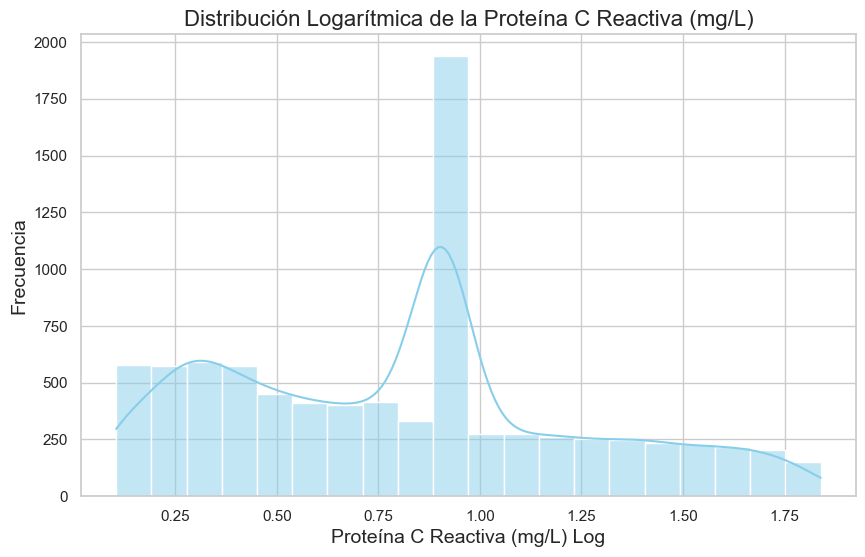

In [165]:
# Aplicar la transformación logarítmica
proteina_c['Proteína C Reactiva (mg/L) Log'] = np.log1p(proteina_c['Proteína C Reactiva (mg/L)'])

# Visualizar la distribución después de la transformación logarítmica
plt.figure(figsize=(10, 6))
sns.histplot(proteina_c['Proteína C Reactiva (mg/L) Log'].dropna(), bins=20, kde=True, color="skyblue")
plt.title('Distribución Logarítmica de la Proteína C Reactiva (mg/L)', fontsize=16)
plt.xlabel('Proteína C Reactiva (mg/L) Log', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=200866;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=701627;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

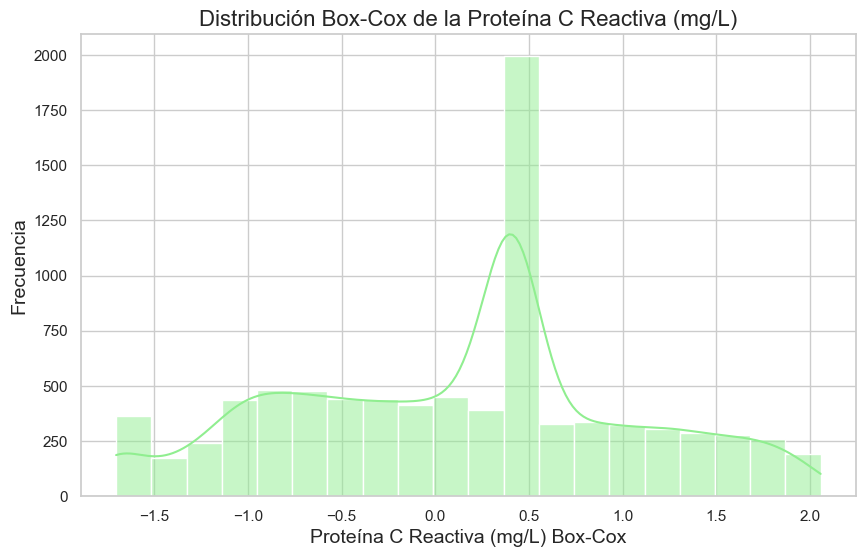

In [166]:
# Aplicar la transformación Box-Cox (requiere valores positivos)
proteina_c_positive = proteina_c[proteina_c['Proteína C Reactiva (mg/L)'] > 0]
proteina_c['Proteína C Reactiva (mg/L) Box-Cox'], _ = stats.boxcox(proteina_c_positive['Proteína C Reactiva (mg/L)'])

# Visualizar la distribución después de la transformación Box-Cox
plt.figure(figsize=(10, 6))
sns.histplot(proteina_c['Proteína C Reactiva (mg/L) Box-Cox'].dropna(), bins=20, kde=True, color="lightgreen")
plt.title('Distribución Box-Cox de la Proteína C Reactiva (mg/L)', fontsize=16)
plt.xlabel('Proteína C Reactiva (mg/L) Box-Cox', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

[09/08/24 05:33:12] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=164211;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=65508;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

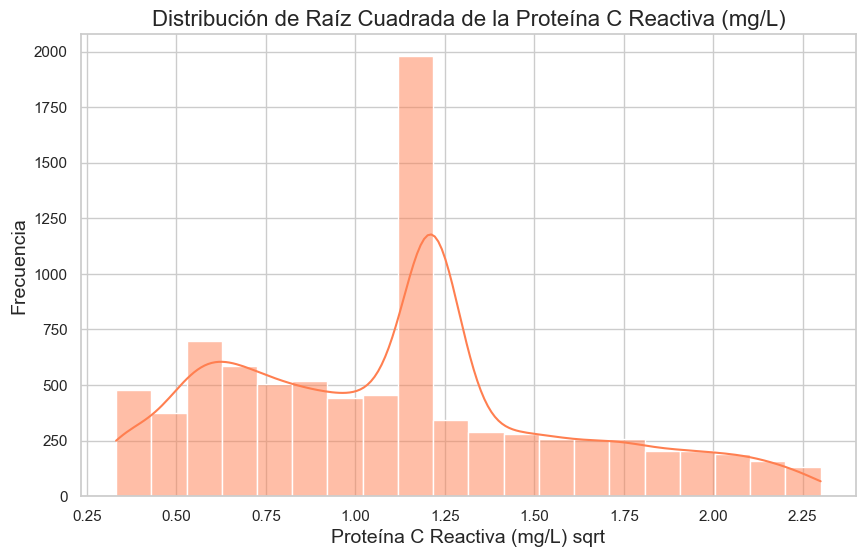

In [167]:
# Aplicar la transformación de raíz cuadrada
proteina_c['Proteína C Reactiva (mg/L) sqrt'] = np.sqrt(proteina_c['Proteína C Reactiva (mg/L)'])

# Visualizar la distribución después de la transformación de raíz cuadrada
plt.figure(figsize=(10, 6))
sns.histplot(proteina_c['Proteína C Reactiva (mg/L) sqrt'].dropna(), bins=20, kde=True, color="coral")
plt.title('Distribución de Raíz Cuadrada de la Proteína C Reactiva (mg/L)', fontsize=16)
plt.xlabel('Proteína C Reactiva (mg/L) sqrt', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=103246;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=24872;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

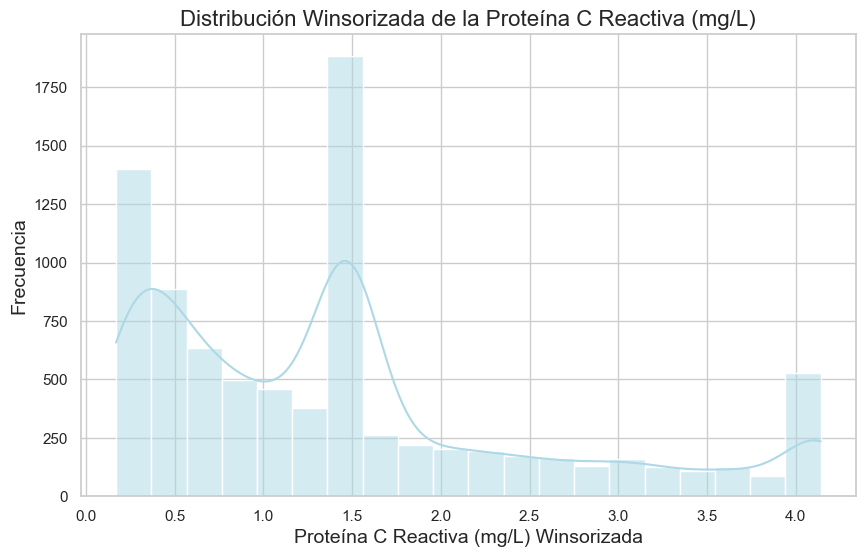

In [168]:
# Aplicar winsorización a los datos (cap los valores en el percentil 95)
proteina_c['Proteína C Reactiva (mg/L) Winsorizada'] = mstats.winsorize(proteina_c['Proteína C Reactiva (mg/L)'], limits=[0.05, 0.05])

# Visualizar la distribución después de la winsorización
plt.figure(figsize=(10, 6))
sns.histplot(proteina_c['Proteína C Reactiva (mg/L) Winsorizada'].dropna(), bins=20, kde=True, color="lightblue")
plt.title('Distribución Winsorizada de la Proteína C Reactiva (mg/L)', fontsize=16)
plt.xlabel('Proteína C Reactiva (mg/L) Winsorizada', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

# Combinación de Dataset con Depresión

In [169]:
depresion = depresion.rename(columns={
    'SEQN': 'ID',
    'DPQ010': 'Poco Interés en Hacer Cosas',
    'DPQ020': 'Sentirse Deprimido o Sin Esperanza',
    'DPQ030': 'Problemas para Dormir',
    'DPQ040': 'Cansancio o Poca Energía',
    'DPQ050': 'Poco Apetito o Comer en Exceso',
    'DPQ060': 'Sentirse Mal Acerca de Uno Mismo',
    'DPQ070': 'Problemas de Concentración',
    'DPQ080': 'Movimientos o Hablar Lento o Rápido',
    'DPQ090': 'Pensamientos de Muerte o Autolesión',
    'DPQ100': 'Dificultad que Estos Problemas Causan'
})

In [170]:
consideracion_depresion = pd.merge(consideracion, depresion, on='ID', how='inner')

In [171]:
consideracion_depresion

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Poco Interés en Hacer Cosas,Sentirse Deprimido o Sin Esperanza,Problemas para Dormir,Cansancio o Poca Energía,Poco Apetito o Comer en Exceso,Sentirse Mal Acerca de Uno Mismo,Problemas de Concentración,Movimientos o Hablar Lento o Rápido,Pensamientos de Muerte o Autolesión,Dificultad que Estos Problemas Causan
0,109273.00,36.00,1.00,3.00,4.00,3.00,0.91,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,0.00,0.00
1,109274.00,68.00,1.00,7.00,4.00,3.00,1.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
2,109282.00,76.00,1.00,3.00,5.00,1.00,1.90,0.00,1.00,0.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00
3,109286.00,33.00,2.00,6.00,5.00,1.00,1.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109292.00,58.00,1.00,2.00,3.00,2.00,1.26,0.00,3.00,0.00,2.00,0.00,3.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6313,124810.00,56.00,2.00,4.00,4.00,3.00,1.39,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
6314,124814.00,64.00,1.00,4.00,3.00,2.00,1.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
6315,124817.00,67.00,2.00,1.00,2.00,1.00,1.48,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
6316,124818.00,40.00,1.00,4.00,5.00,1.00,1.95,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [172]:
consideracion_depresion.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Poco Interés en Hacer Cosas,Sentirse Deprimido o Sin Esperanza,Problemas para Dormir,Cansancio o Poca Energía,Poco Apetito o Comer en Exceso,Sentirse Mal Acerca de Uno Mismo,Problemas de Concentración,Movimientos o Hablar Lento o Rápido,Pensamientos de Muerte o Autolesión,Dificultad que Estos Problemas Causan
count,6318.00,6318.00,6318.00,6318.00,6159.00,6159.00,6318.00,5870.00,5869.00,5869.00,5869.00,5869.00,5868.00,5868.00,5868.00,5866.00,4015.00
mean,117147.90,49.03,1.52,3.44,3.37,1.71,1.34,0.42,0.40,0.70,0.80,0.44,0.28,0.30,0.19,0.06,0.36
std,4479.07,18.73,0.50,1.56,1.17,1.26,0.48,0.81,0.77,1.02,0.98,0.85,0.69,0.75,0.62,0.36,0.66
min,109273.00,18.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,113321.25,33.00,1.00,3.00,3.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,117180.50,50.00,2.00,3.00,4.00,1.00,1.32,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,121072.50,64.00,2.00,4.00,4.00,2.00,1.70,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
max,124821.00,80.00,2.00,7.00,9.00,77.00,2.23,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00


In [173]:
def detectar_outliers_zscore(df, columna, umbral=3):
    z_scores = np.abs(stats.zscore(df[columna].dropna()))
    z_scores_series = pd.Series(z_scores, index=df[columna].dropna().index)
    outliers = df.loc[z_scores_series[z_scores_series > umbral].index]
    return outliers
    
outliers_zscore = detectar_outliers_zscore(depresion, 'Poco Interés en Hacer Cosas')
display(outliers_zscore)

,ID,Poco Interés en Hacer Cosas,Sentirse Deprimido o Sin Esperanza,Problemas para Dormir,Cansancio o Poca Energía,Poco Apetito o Comer en Exceso,Sentirse Mal Acerca de Uno Mismo,Problemas de Concentración,Movimientos o Hablar Lento o Rápido,Pensamientos de Muerte o Autolesión,Dificultad que Estos Problemas Causan
94,109459.00,3.00,0.00,2.00,3.00,3.00,1.00,1.00,1.00,0.00,0.00
131,109530.00,3.00,1.00,1.00,1.00,2.00,0.00,2.00,0.00,0.00,0.00
145,109551.00,3.00,1.00,1.00,2.00,0.00,3.00,2.00,2.00,0.00,1.00
190,109630.00,3.00,1.00,0.00,3.00,0.00,0.00,0.00,1.00,0.00,0.00
214,109673.00,3.00,3.00,3.00,2.00,2.00,3.00,3.00,3.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
8838,124615.00,3.00,2.00,3.00,3.00,2.00,1.00,3.00,3.00,0.00,3.00
8879,124690.00,3.00,2.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00
8901,124726.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,0.00,3.00,2.00
8908,124737.00,3.00,0.00,1.00,2.00,3.00,0.00,1.00,0.00,0.00,1.00


[09/08/24 05:33:13] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=255942;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=579571;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

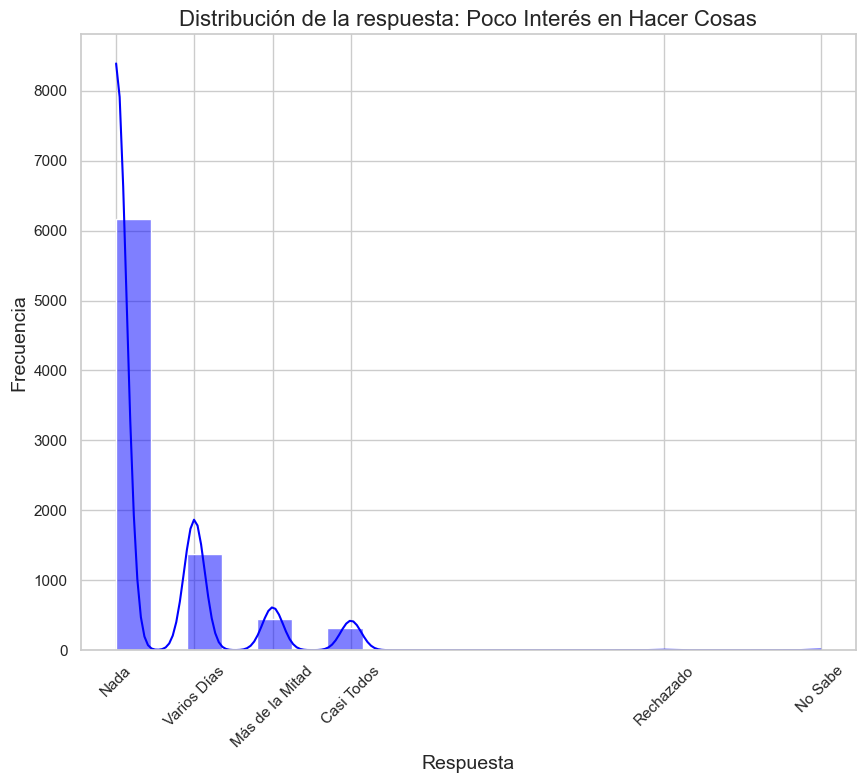

In [174]:
# Histograma de la columna 'Poca Interés en Hacer Cosas'
plt.figure(figsize=(10, 8))
sns.histplot(depresion['Poco Interés en Hacer Cosas'].dropna(), bins=20, kde=True, color="blue")
plt.title('Distribución de la respuesta: Poco Interés en Hacer Cosas', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(ticks=[0, 1, 2, 3, 7, 9], labels=['Nada', 'Varios Días', 'Más de la Mitad', 'Casi Todos', 'Rechazado', 'No Sabe'])
plt.xticks(rotation=45)  # Rota las etiquetas del eje X 45 grados
plt.show()

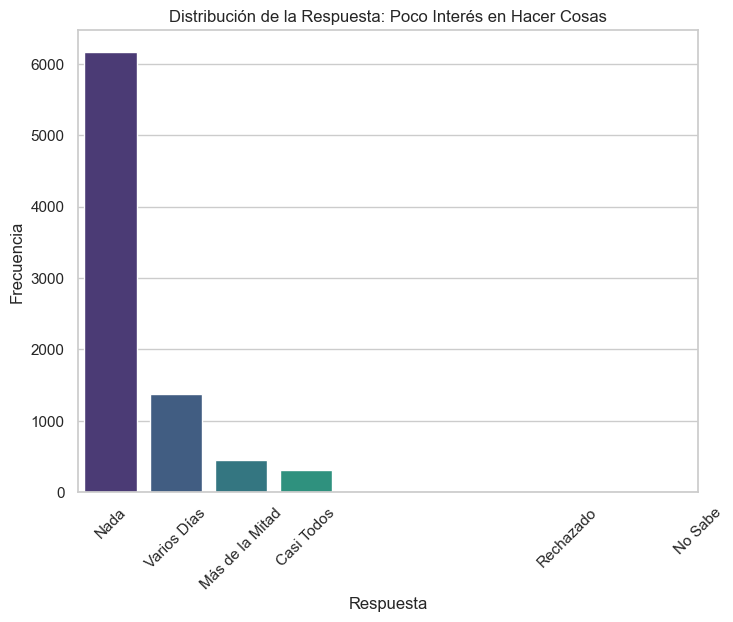

In [175]:
sns.set(style="whitegrid")

# Pregunta 1: Distribución para 'Poca Interés en Hacer Cosas' (DPQ010)
plt.figure(figsize=(8, 6))
sns.countplot(x='Poco Interés en Hacer Cosas', data=depresion, palette="viridis")
plt.title('Distribución de la Respuesta: Poco Interés en Hacer Cosas')
plt.xlabel('Respuesta')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1, 2, 3, 7, 9], labels=['Nada', 'Varios Días', 'Más de la Mitad', 'Casi Todos', 'Rechazado', 'No Sabe'])
plt.xticks(rotation=45)  # Rota las etiquetas del eje X 45 grados
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=409026;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=587090;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

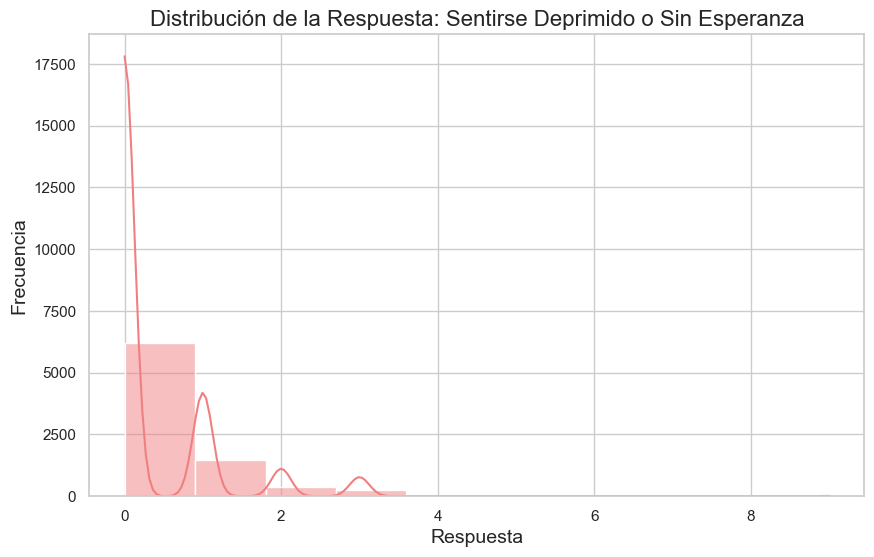

In [176]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Sentirse Deprimido o Sin Esperanza'].dropna(), bins=10, kde=True, color="lightcoral")
plt.title('Distribución de la Respuesta: Sentirse Deprimido o Sin Esperanza', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=580497;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=769011;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

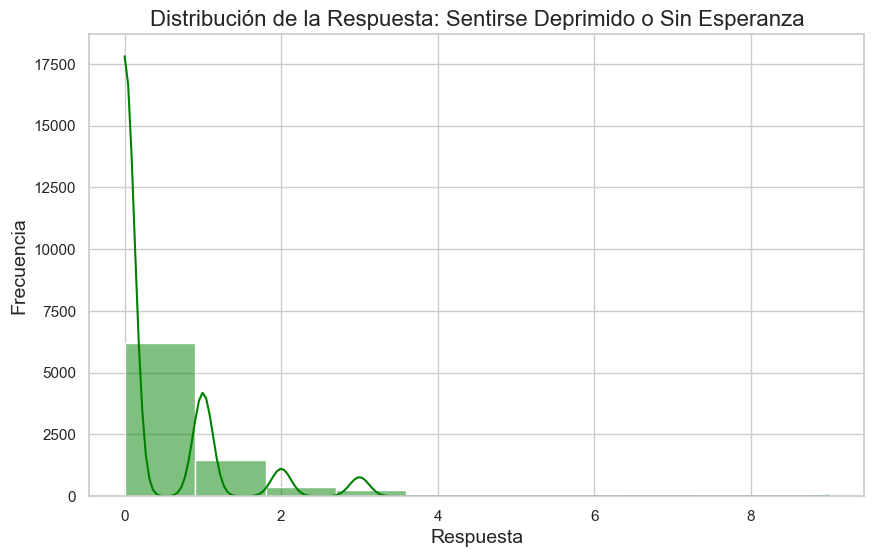

In [177]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Sentirse Deprimido o Sin Esperanza'].dropna(), bins=10, kde=True, color="green")
plt.title('Distribución de la Respuesta: Sentirse Deprimido o Sin Esperanza', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=284383;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=876050;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

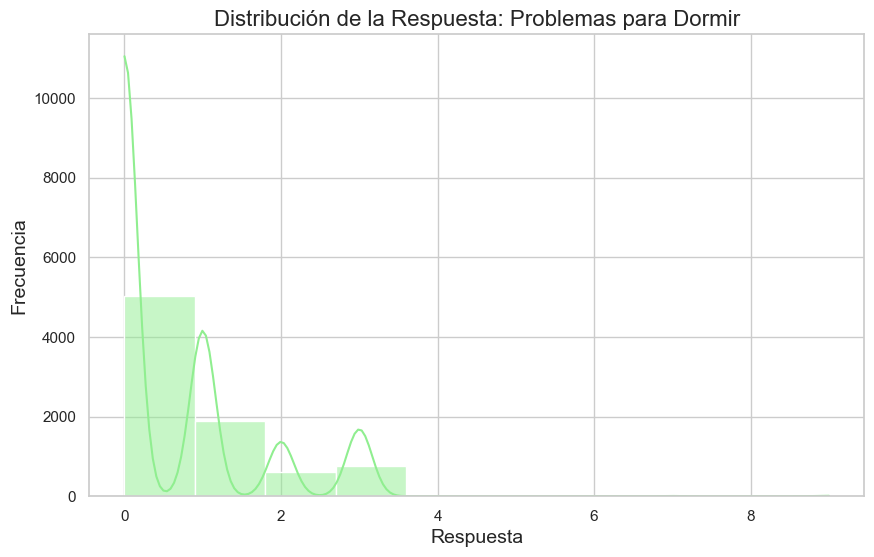

In [178]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Problemas para Dormir'].dropna(), bins=10, kde=True, color="lightgreen")
plt.title('Distribución de la Respuesta: Problemas para Dormir', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

[09/08/24 05:33:14] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=560966;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=83165;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

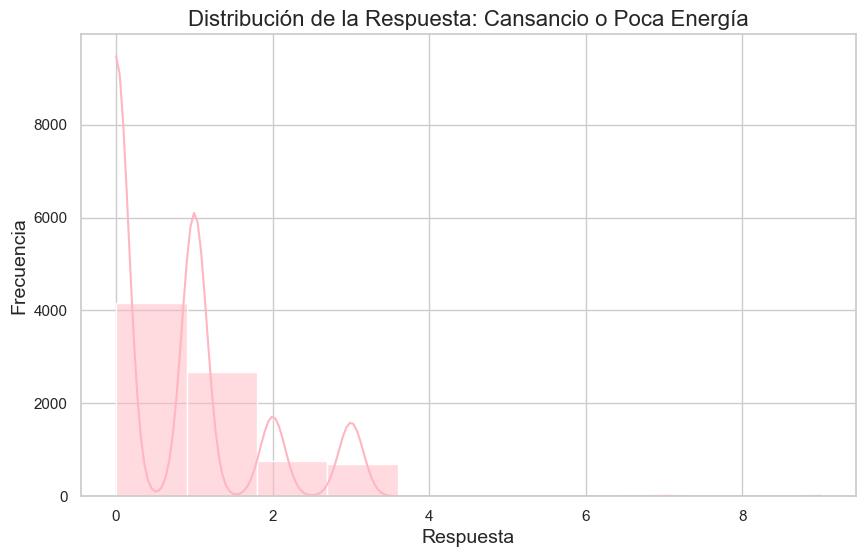

In [179]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Cansancio o Poca Energía'].dropna(), bins=10, kde=True, color="lightpink")
plt.title('Distribución de la Respuesta: Cansancio o Poca Energía', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=738492;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=7826;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

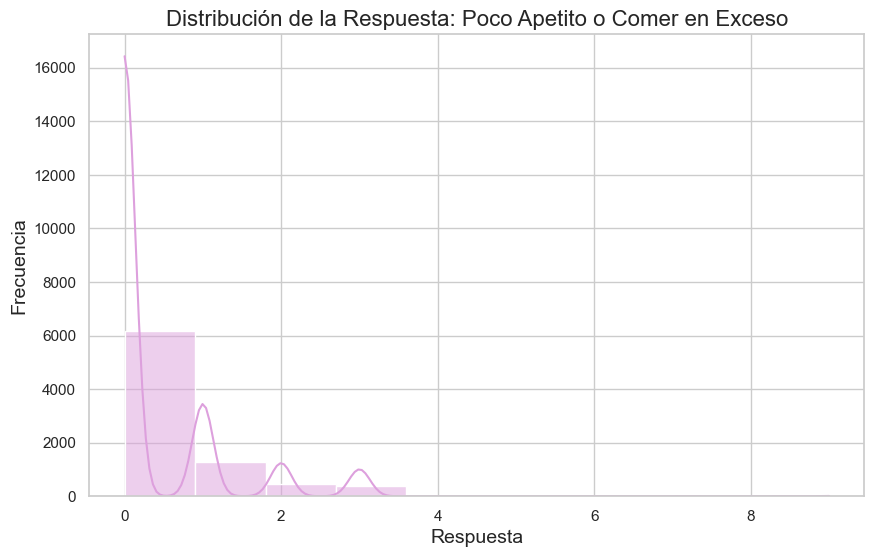

In [180]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Poco Apetito o Comer en Exceso'].dropna(), bins=10, kde=True, color="plum")
plt.title('Distribución de la Respuesta: Poco Apetito o Comer en Exceso', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=889955;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=529794;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

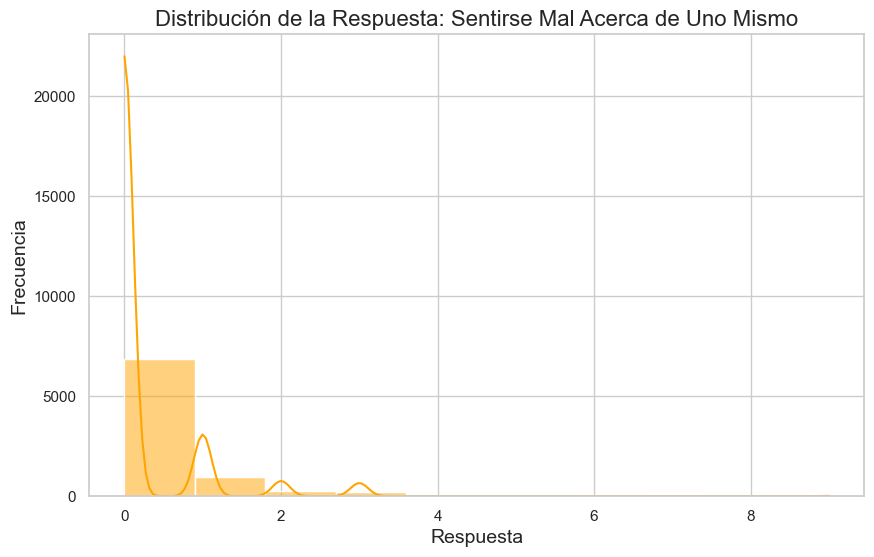

In [181]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Sentirse Mal Acerca de Uno Mismo'].dropna(), bins=10, kde=True, color="orange")
plt.title('Distribución de la Respuesta: Sentirse Mal Acerca de Uno Mismo', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=277346;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=679689;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

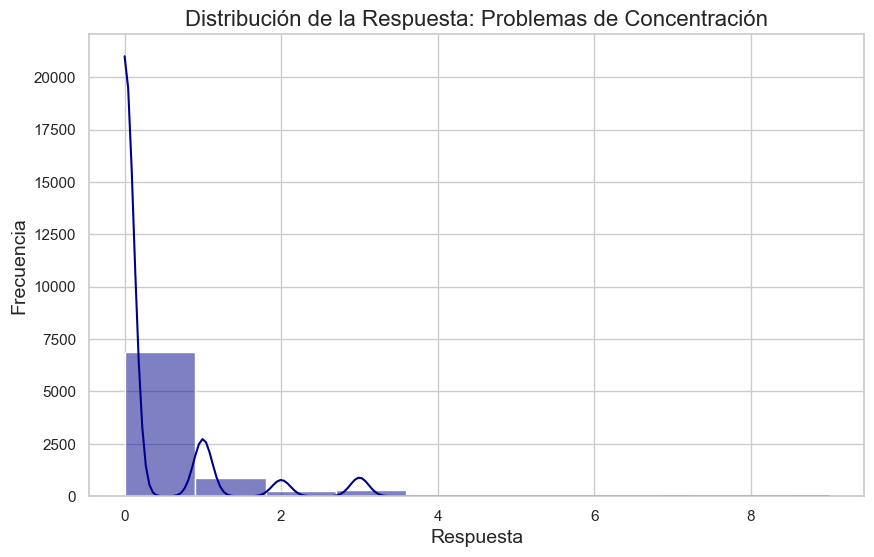

In [182]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Problemas de Concentración'].dropna(), bins=10, kde=True, color="darkblue")
plt.title('Distribución de la Respuesta: Problemas de Concentración', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

                    WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=540889;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=368775;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

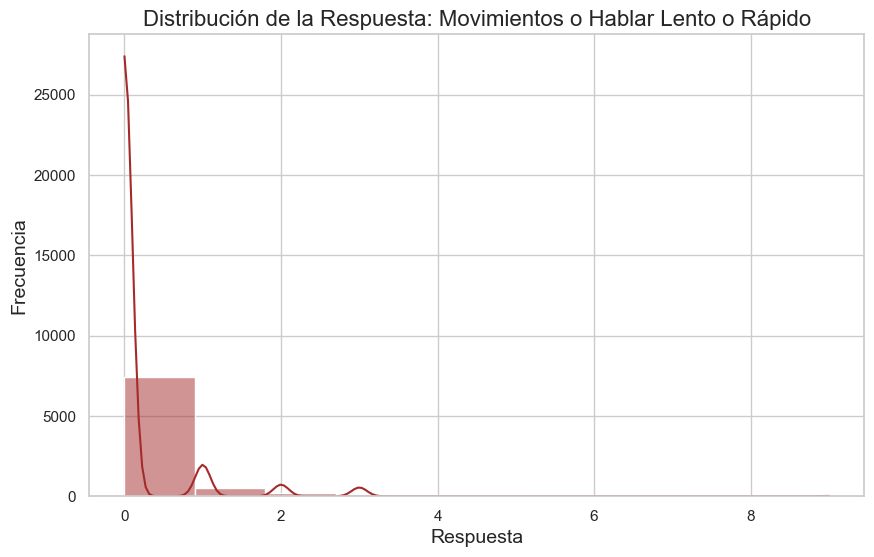

In [183]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Movimientos o Hablar Lento o Rápido'].dropna(), bins=10, kde=True, color="brown")
plt.title('Distribución de la Respuesta: Movimientos o Hablar Lento o Rápido', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

[09/08/24 05:33:15] WARNING  C:\Python312\Lib\site-packages\seaborn\_oldcore.py:1119:               ]8;id=560676;file://C:\Python312\Lib\warnings.py\warnings.py]8;;\:]8;id=793053;file://C:\Python312\Lib\warnings.py#109\109]8;;\
                             FutureWarning: use_inf_as_na option is deprecated and will be removed                 
                             in a future version. Convert inf values to NaN before operating                       
                             instead.                                                                              
                               with pd.option_context('mode.use_inf_as_na', True):                                 
                                                                                                                   

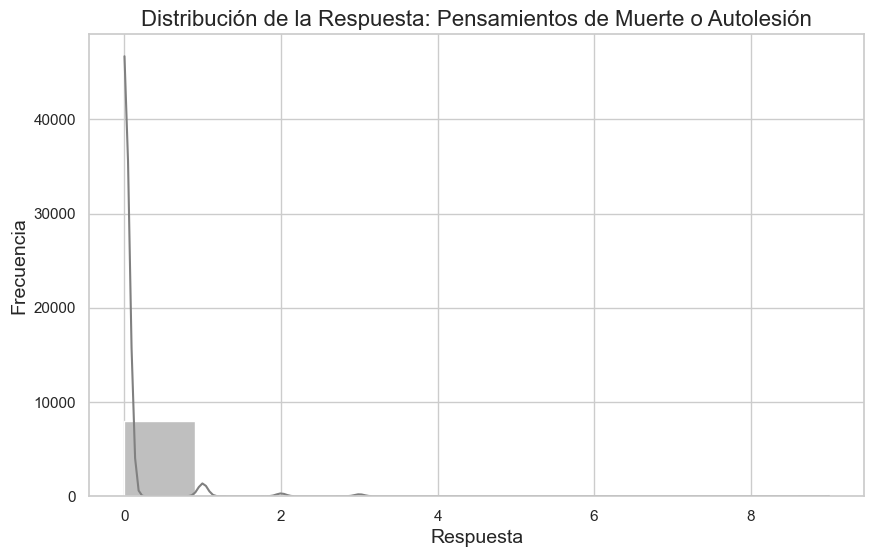

In [184]:
plt.figure(figsize=(10, 6))
sns.histplot(depresion['Pensamientos de Muerte o Autolesión'].dropna(), bins=10, kde=True, color="grey")
plt.title('Distribución de la Respuesta: Pensamientos de Muerte o Autolesión', fontsize=16)
plt.xlabel('Respuesta', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

In [192]:
df= pd.merge(consideracion, insulina, on='ID', how='inner')

In [193]:
df.head()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina
0,109264.00,13.00,2.00,1.00,1.00,3.00,0.91,27533.17,6.05,36.30,0.00
1,109274.00,68.00,1.00,7.00,4.00,3.00,1.10,16281.76,13.52,81.12,0.00
2,109277.00,12.00,2.00,1.00,1.00,3.00,1.16,32230.05,6.44,38.64,0.00
3,109282.00,76.00,1.00,3.00,5.00,1.00,1.90,79007.10,7.49,44.94,0.00
4,109286.00,33.00,2.00,6.00,5.00,1.00,1.17,0.00,16.46,98.76,0.00


In [187]:
df.describe()

,ID,Edad_x,Genero_x,Raza_x,Educacion_x,EstadoCivil_x,NivelPobreza_x,Edad_y,Genero_y,Raza_y,Educacion_y,EstadoCivil_y,NivelPobreza_y,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina
count,3283.00,3283.00,3283.00,3283.00,3224.00,3224.00,3283.00,3283.00,3283.00,3283.00,3224.00,3224.00,3283.00,3283.00,3283.00,2940.00,2940.00
mean,117212.51,44.19,1.52,3.48,3.13,1.87,1.33,15.20,1.52,3.48,3.13,1.87,1.33,48965.24,0.00,63.99,0.00
std,4461.67,20.89,0.50,1.62,1.26,0.88,0.49,5.16,0.50,1.62,1.26,0.88,0.49,61216.33,0.95,35.30,0.05
min,109264.00,12.00,1.00,1.00,1.00,1.00,0.00,6.34,1.00,1.00,1.00,1.00,0.00,0.00,-2.29,4.26,0.00
25%,113414.00,25.00,1.00,3.00,2.00,1.00,1.00,10.64,1.00,3.00,2.00,1.00,1.00,16920.53,-0.69,36.83,0.00
50%,117367.00,44.00,2.00,3.00,3.00,2.00,1.32,15.63,2.00,3.00,3.00,2.00,1.32,31761.50,0.00,56.94,0.00
75%,121060.50,62.00,2.00,4.00,4.00,3.00,1.70,19.66,2.00,4.00,4.00,3.00,1.70,56981.42,0.66,84.78,0.00
max,124821.00,80.00,2.00,7.00,5.00,3.00,2.23,23.27,2.00,7.00,5.00,3.00,2.23,741259.19,2.08,161.46,1.00


In [194]:
df2= pd.merge(df, colesterol, on='ID', how='inner')

In [195]:
df2.head()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina,Colesterol Total (mg/dL),Colesterol Total (mmol/L)
0,109264.00,13.00,2.00,1.00,1.00,3.00,0.91,27533.17,6.05,36.30,0.00,166.00,4.29
1,109274.00,68.00,1.00,7.00,4.00,3.00,1.10,16281.76,13.52,81.12,0.00,105.00,2.72
2,109277.00,12.00,2.00,1.00,1.00,3.00,1.16,32230.05,6.44,38.64,0.00,129.00,3.34
3,109282.00,76.00,1.00,3.00,5.00,1.00,1.90,79007.10,7.49,44.94,0.00,233.00,6.03
4,109286.00,33.00,2.00,6.00,5.00,1.00,1.17,0.00,16.46,98.76,0.00,236.00,6.10


In [190]:
df2.describe()

,ID,Edad_x,Genero_x,Raza_x,Educacion_x,EstadoCivil_x,NivelPobreza_x,Edad_y,Genero_y,Raza_y,...,Insulina (pmol/L),Código de Comentario de Insulina,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Colesterol Total (mg/dL),Colesterol Total (mmol/L)
count,3215.00,3215.00,3215.00,3215.00,3157.00,3157.00,3215.00,3215.00,3215.00,3215.00,...,2872.00,2872.00,3215.00,3215.00,3215.00,3157.00,3157.00,3215.00,2902.00,2902.00
mean,117205.46,43.97,1.52,3.48,3.12,1.87,1.33,15.14,1.52,3.48,...,64.18,0.00,43.97,1.52,3.48,3.12,1.87,1.33,176.11,4.55
std,4471.08,20.93,0.50,1.61,1.26,0.88,0.49,5.17,0.50,1.61,...,35.36,0.05,20.93,0.50,1.61,1.26,0.88,0.49,37.12,0.96
min,109264.00,12.00,1.00,1.00,1.00,1.00,0.00,6.34,1.00,1.00,...,4.26,0.00,12.00,1.00,1.00,1.00,1.00,0.00,73.00,1.89
25%,113387.50,25.00,1.00,3.00,2.00,1.00,1.00,10.64,1.00,3.00,...,36.84,0.00,25.00,1.00,3.00,2.00,1.00,1.00,150.00,3.88
50%,117370.00,44.00,2.00,3.00,3.00,2.00,1.32,15.63,2.00,3.00,...,57.15,0.00,44.00,2.00,3.00,3.00,2.00,1.32,172.00,4.45
75%,121069.00,62.00,2.00,4.00,4.00,3.00,1.69,19.66,2.00,4.00,...,85.11,0.00,62.00,2.00,4.00,4.00,3.00,1.69,201.00,5.20
max,124821.00,80.00,2.00,7.00,5.00,3.00,2.23,23.27,2.00,7.00,...,161.46,1.00,80.00,2.00,7.00,5.00,3.00,2.23,278.00,7.19


In [196]:
df3= pd.merge(df2, proteinaC, on='ID', how='inner')

In [197]:
df3

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina,Colesterol Total (mg/dL),Colesterol Total (mmol/L),Proteína C Reactiva (mg/L),Código de Comentario de Proteína C Reactiva
0,109264.00,13.00,2.00,1.00,1.00,3.00,0.91,27533.17,6.05,36.30,0.00,166.00,4.29,0.11,1.00
1,109274.00,68.00,1.00,7.00,4.00,3.00,1.10,16281.76,13.52,81.12,0.00,105.00,2.72,1.60,0.00
2,109277.00,12.00,2.00,1.00,1.00,3.00,1.16,32230.05,6.44,38.64,0.00,129.00,3.34,2.46,0.00
3,109282.00,76.00,1.00,3.00,5.00,1.00,1.90,79007.10,7.49,44.94,0.00,233.00,6.03,3.11,0.00
4,109286.00,33.00,2.00,6.00,5.00,1.00,1.17,0.00,16.46,98.76,0.00,236.00,6.10,3.72,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3645,124799.00,80.00,2.00,3.00,3.00,2.00,1.29,67466.96,4.33,25.98,0.00,183.00,4.73,1.80,0.00
3646,124803.00,46.00,2.00,1.00,4.00,2.00,1.17,51646.77,16.97,101.82,0.00,159.00,4.11,1.23,0.00
3647,124810.00,56.00,2.00,4.00,4.00,3.00,1.39,15125.62,20.12,120.72,0.00,211.00,5.46,8.60,0.00
3648,124814.00,64.00,1.00,4.00,3.00,2.00,1.41,9339.90,7.27,43.62,0.00,225.00,5.82,9.00,0.00


In [199]:
df3.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),Código de Comentario de Insulina,Colesterol Total (mg/dL),Colesterol Total (mmol/L),Proteína C Reactiva (mg/L),Código de Comentario de Proteína C Reactiva
count,3650.00,3650.00,3650.00,3650.00,3582.00,3582.00,3650.00,3650.00,3307.00,3307.00,3307.00,3336.00,3336.00,3311.00,3311.00
mean,117187.07,43.93,1.52,3.45,3.12,1.87,1.33,48912.22,15.45,92.69,0.00,178.22,4.61,3.96,0.02
std,4467.37,20.82,0.50,1.62,1.25,0.88,0.48,60974.78,23.11,138.67,0.05,40.87,1.06,7.17,0.13
min,109264.00,12.00,1.00,1.00,1.00,1.00,0.00,0.00,0.71,4.26,0.00,73.00,1.89,0.11,0.00
25%,113370.75,25.00,1.00,3.00,2.00,1.00,1.00,16798.02,6.49,38.94,0.00,150.00,3.88,0.75,0.00
50%,117331.50,44.00,2.00,3.00,3.00,2.00,1.31,31798.15,10.38,62.28,0.00,173.00,4.47,1.84,0.00
75%,121059.25,62.00,2.00,4.00,4.00,3.00,1.68,57227.95,17.15,102.90,0.00,202.00,5.22,4.29,0.00
max,124821.00,80.00,2.00,7.00,5.00,3.00,2.23,741259.19,485.10,2910.60,1.00,446.00,11.53,109.81,1.00


In [200]:
df4 = pd.merge(df3, depresion, on='ID', how='inner')

In [202]:
df4.head()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),...,Poco Interés en Hacer Cosas,Sentirse Deprimido o Sin Esperanza,Problemas para Dormir,Cansancio o Poca Energía,Poco Apetito o Comer en Exceso,Sentirse Mal Acerca de Uno Mismo,Problemas de Concentración,Movimientos o Hablar Lento o Rápido,Pensamientos de Muerte o Autolesión,Dificultad que Estos Problemas Causan
0,109274.00,68.00,1.00,7.00,4.00,3.00,1.10,16281.76,13.52,81.12,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
1,109282.00,76.00,1.00,3.00,5.00,1.00,1.90,79007.10,7.49,44.94,...,0.00,1.00,0.00,1.00,0.00,0.00,0.00,3.00,0.00,0.00
2,109286.00,33.00,2.00,6.00,5.00,1.00,1.17,0.00,16.46,98.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109292.00,58.00,1.00,2.00,3.00,2.00,1.26,0.00,21.40,128.40,...,0.00,3.00,0.00,2.00,0.00,3.00,0.00,0.00,0.00,0.00
4,109307.00,47.00,1.00,6.00,1.00,1.00,1.17,43092.07,8.23,49.38,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN


In [203]:
df4.describe()

,ID,Edad,Genero,Raza,Educacion,EstadoCivil,NivelPobreza,Peso de Submuestra en Ayunas,Insulina (μU/mL),Insulina (pmol/L),...,Poco Interés en Hacer Cosas,Sentirse Deprimido o Sin Esperanza,Problemas para Dormir,Cansancio o Poca Energía,Poco Apetito o Comer en Exceso,Sentirse Mal Acerca de Uno Mismo,Problemas de Concentración,Movimientos o Hablar Lento o Rápido,Pensamientos de Muerte o Autolesión,Dificultad que Estos Problemas Causan
count,3136.00,3136.00,3136.00,3136.00,3068.00,3068.00,3136.00,3136.00,2875.00,2875.00,...,2923.00,2922.00,2922.00,2922.00,2922.00,2922.00,2922.00,2922.00,2921.00,2042.00
mean,117189.45,48.76,1.53,3.45,3.36,1.68,1.34,50593.51,15.46,92.79,...,0.42,0.41,0.71,0.81,0.45,0.28,0.30,0.19,0.07,0.33
std,4495.17,18.39,0.50,1.60,1.17,0.81,0.48,63042.04,24.34,146.02,...,0.80,0.78,1.02,0.95,0.86,0.70,0.73,0.61,0.37,0.64
min,109274.00,18.00,1.00,1.00,1.00,1.00,0.00,0.00,0.71,4.26,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,113363.75,33.00,1.00,3.00,3.00,1.00,1.01,17293.98,6.31,37.89,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,117307.50,49.00,2.00,3.00,4.00,1.00,1.33,32270.87,10.23,61.38,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,121105.75,63.00,2.00,4.00,4.00,2.00,1.70,58887.91,17.08,102.48,...,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
max,124821.00,80.00,2.00,7.00,5.00,3.00,2.23,741259.19,485.10,2910.60,...,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00


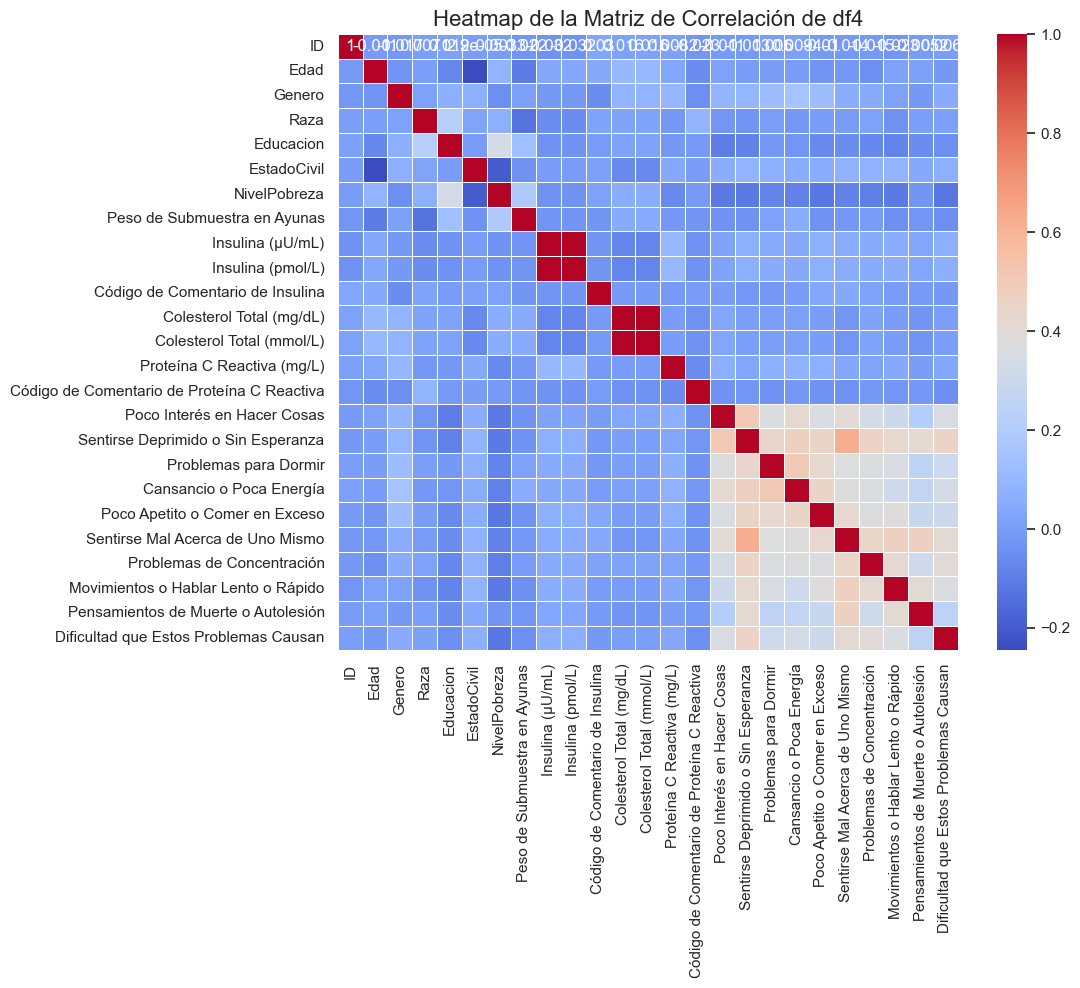

In [204]:
correlation_matrix = df4.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de la Matriz de Correlación de df4', fontsize=16)
plt.show()